## Discente: Tamires Wedekim de Toledo

##DataSet [Cervical Cancer (Risk Factors)](https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors)

Fonte de dados: UCI Machine Learning Repository
[Artigo publicado](https://peerj.com/articles/cs-154/).

Escolhi o dataset desta análise por proximidade com o tema do meu interesse. O conjunto de dados foi coletado no 'Hospital Universitário de Caracas', em Caracas, Venezuela. O dataset centra-se na previsão de indicadores/diagnóstico de câncer do colo do útero. As variáveis apresentam informações demográficas, hábitos e registros médicos históricos de 858 pacientes. Vários pacientes decidiram não responder a algumas perguntas por questões de privacidade (valores faltantes). O dataset já veio com o tratamento das variáveis categóricas transformadas em variáveis dummy.

A base de dados vem dividido em dois datasets, sendo o critério da divisão as variáveis preditoras e alvos, eu fiz a junção da base para trabalhar o dados.

Optei por trabalhar como variável alvo somente a variável 'Biopsy', que trata-se da biopsia do colo do útero.

Segue abaixo o dicionário de Variáveis:

| Variável  | Tradução | Descrição |
|-----------|-----|-----------|
|Age | Idade | |
| Number of sexual partners | Número de parceiros sexuais | |
| First sexual intercourse (age) | Primeira relação sexual (idade) | |
| Num of pregnancies | Número de gestações | |
| Smokes | Fuma | |
| Smokes (years) | Fuma (anos) | |
| Smokes (packs/year) | Fuma (pacotes/ano) | |
| Hormonal Contraceptives | Contraceptivo hormonal | |
| Hormonal Contraceptives (years) | Contraceptivo hormonal (anos) | |
| IUD | DIU | |
| IUD (years) | DIU (anos) | |
| STDs | IST | Infecções sexualmente transmissíveis |
| STDs (number) | IST (número) | |
| STDs:condylomatosis | IST: Condiloma | Verruga genital |
| STDs:cervical condylomatosis | IST: Condiloma cervical | lesão no colo do útero |
| STDs:vaginal condylomatosis | IST: Condiloma vaginal | Verruga vaginal |
| STDs:vulvo-perineal condylomatosis | IST: Condiloma vulvo-perineal | verruga na região genital e no ânus|
| STDs:syphilis | IST: sífilis | |
| STDs:pelvic inflammatory disease | IST:  Doença inflamatória pélvica (DIP) | infecção dos órgãos reprodutores femininos superiores |
|STDs:genital herpes | IST: Herpes genital | |
| STDs:molluscum contagiosum | IST: Molusco contagioso | |
| STDs:AIDS | IST: AIDS | Pessoal vivendo com HIV |
| STDs:HIV | IST: HIV | O vírus |
| STDs:Hepatitis B | IST: Hepatite B | |
| STDs:HPV | IST: HPV | |
| STDs: Number of diagnosis | IST: Número de diagnósticos | |
| STDs: Time since first diagnosis | IST: Tempo desde o primeiro diagnóstico | |
| STDs: Time since last diagnosis | IST: Tempo desde o último diagnóstico | |
| Dx:Cancer | Diagnóstico: Câncer| CID-10 C53 Neoplasia maligna do colo do útero |
| Dx:CIN | Diagnóstico NIC | Displasia cervical - NIC 1, NIC 2, NIC 3 -  base de dados trata como dummy |
| Dx:HPV | Diagnóstico HPV | |
| Dx | Diagnóstico | |
| Hinselmann: target variable | Colposcopia | |
| Schiller: target variable | Teste de Schiller | Iodo na colposcopia |
| Cytology: target variable | Citologia cervical | Papanicolau |
| Biopsy: target variable | Biopsia do colo do útero | |

In [ ]:
# instalando a base dados ucimlrepo
!pip install ucimlrepo

In [ ]:
# importando a biblioteca pandas
import pandas as pd

#importanto biblioteca seaborn
import seaborn as sns

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# importando a biblioteca numpy
import numpy as np

In [ ]:
# importando a função fetch_ucirepo da biblioteca ucimlrepo
from ucimlrepo import fetch_ucirepo

#  baixando o dataset com o ID 383
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# juntando as variáveis preditoras e a alvo em um único df (sem separar preditoras e alvo)
# concatenação ocorre horizontalmente (axis=1)
df = pd.concat([cervical_cancer_risk_factors.data.features, cervical_cancer_risk_factors.data.targets], axis=1)

# vizualizar o df
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.000000,16.000000,4.000000,1.000000,37.000000,37.000000,1.000000,3.000000,0.000000,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.000000,21.000000,4.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
# quantidade de linhas e colunas
df.shape

(858, 36)

In [ ]:
# informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

Não há variáveis categóricas.

In [ ]:
# verificando valores ausentes para cada coluna
df.isna().sum()

,0
Age,0
Number of sexual partners,26
First sexual intercourse,7
Num of pregnancies,56
Smokes,13
Smokes (years),13
Smokes (packs/year),13
Hormonal Contraceptives,108
Hormonal Contraceptives (years),108
IUD,117


In [ ]:
# Descrição estatística das variáveis ivertendo linhas e colunas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.000000,26.820513,8.497948,13.000000,20.000000,25.000000,32.000000,84.000000
Number of sexual partners,832.000000,2.527644,1.667760,1.000000,2.000000,2.000000,3.000000,28.000000
First sexual intercourse,851.000000,16.995300,2.803355,10.000000,15.000000,17.000000,18.000000,32.000000
Num of pregnancies,802.000000,2.275561,1.447414,0.000000,1.000000,2.000000,3.000000,11.000000
Smokes,845.000000,0.145562,0.352876,0.000000,0.000000,0.000000,0.000000,1.000000
Smokes (years),845.000000,1.219721,4.089017,0.000000,0.000000,0.000000,0.000000,37.000000
Smokes (packs/year),845.000000,0.453144,2.226610,0.000000,0.000000,0.000000,0.000000,37.000000
Hormonal Contraceptives,750.000000,0.641333,0.479929,0.000000,0.000000,1.000000,1.000000,1.000000
Hormonal Contraceptives (years),750.000000,2.256419,3.764254,0.000000,0.000000,0.500000,3.000000,30.000000
IUD,741.000000,0.112011,0.315593,0.000000,0.000000,0.000000,0.000000,1.000000


Há variáveis que não estão padronizadas (média ≠ de 0 e dp ≠ de 1)

In [ ]:
#Contagem de itens na coluna Age
#Dados ausentes = 0
df['Age'].value_counts(dropna=False)

,count
Age,
23,54
18,50
21,46
20,45
19,44
24,39
25,39
26,38
28,37


In [ ]:
#Contagem de itens na coluna Number of sexual partners
#Dados ausentes = 26
df['Number of sexual partners'].value_counts(dropna=False)

,count
Number of sexual partners,
2.000000,272
3.000000,208
1.000000,206
4.000000,78
5.000000,44
NaN,26
6.000000,9
7.000000,7
8.000000,4


In [ ]:
#Contagem de itens na coluna Age
#Dados ausentes = 7
df['First sexual intercourse'].value_counts(dropna=False)

,count
First sexual intercourse,
15.000000,163
17.000000,151
18.000000,137
16.000000,121
14.000000,79
19.000000,60
20.000000,37
13.000000,25
21.000000,20


In [ ]:
#Contagem de itens na coluna Num of pregnancies
#Dados ausentes = 56
df['Num of pregnancies'].value_counts(dropna=False)

,count
Num of pregnancies,
1.000000,270
2.000000,240
3.000000,139
4.000000,74
NaN,56
5.000000,35
6.000000,18
0.000000,16
7.000000,6


In [ ]:
#Contagem de itens na coluna Smokes
#Dados ausentes = 13
df['Smokes'].value_counts(dropna=False)

,count
Smokes,
0.000000,722
1.000000,123
NaN,13


In [ ]:
#Contagem de itens na coluna Smokes (years)
#Dados ausentes = 13
df['Smokes (years)'].value_counts(dropna=False)

,count
Smokes (years),
0.000000,722
1.266973,15
NaN,13
5.000000,9
9.000000,9
1.000000,8
3.000000,7
2.000000,7
16.000000,6


In [ ]:
#Contagem de itens na coluna Smokes (packs/year)
#Dados ausentes = 13
df['Smokes (packs/year)'].value_counts(dropna=False)

,count
Smokes (packs/year),
0.000000,722
0.513202,18
NaN,13
1.000000,6
3.000000,5
...,...
37.000000,1
1.250000,1
2.250000,1


In [ ]:
#Contagem de itens na coluna Hormonal Contraceptives
#Dados ausentes = 108
df['Hormonal Contraceptives'].value_counts(dropna=False)

,count
Hormonal Contraceptives,
1.000000,481
0.000000,269
NaN,108


In [ ]:
#Contagem de itens na coluna Hormonal Contraceptives (years)
#Dados ausentes = 108
df['Hormonal Contraceptives (years)'].value_counts(dropna=False)

,count
Hormonal Contraceptives (years),
0.000000,269
NaN,108
1.000000,77
0.250000,41
2.000000,40
3.000000,39
5.000000,34
0.080000,25
0.500000,25


In [ ]:
#Contagem de itens na coluna IUD (DIU)
#Dados ausentes = 117
df['IUD'].value_counts(dropna=False)

,count
IUD,
0.000000,658
NaN,117
1.000000,83


In [ ]:
#Contagem de itens na coluna IUD (years)
#Dados ausentes = 117
df['IUD (years)'].value_counts(dropna=False)

,count
IUD (years),
0.000000,658
NaN,117
3.000000,11
2.000000,10
5.000000,9
1.000000,8
8.000000,7
7.000000,7
4.000000,5


In [ ]:
#Contagem de itens na coluna STDs
#Dados ausentes = 105
df['STDs'].value_counts(dropna=False)

,count
STDs,
0.000000,674
NaN,105
1.000000,79


In [ ]:
#Contagem de itens na coluna STDs (number)
#Dados ausentes = 105
df['STDs (number)'].value_counts(dropna=False)

,count
STDs (number),
0.000000,674
NaN,105
2.000000,37
1.000000,34
3.000000,7
4.000000,1


In [ ]:
#Contagem de itens na coluna STDs:condylomatosis
#Dados ausentes = 105
df['STDs:condylomatosis'].value_counts(dropna=False)

,count
STDs:condylomatosis,
0.000000,709
NaN,105
1.000000,44


In [ ]:
#Contagem de itens na coluna STDs:cervical condylomatosis
#Dados ausentes = 105
df['STDs:cervical condylomatosis'].value_counts(dropna=False)

,count
STDs:cervical condylomatosis,
0.000000,753
NaN,105


In [ ]:
#Contagem de itens na coluna STDs:vaginal condylomatosis
#Dados ausentes = 105
df['STDs:vaginal condylomatosis'].value_counts(dropna=False)

,count
STDs:vaginal condylomatosis,
0.000000,749
NaN,105
1.000000,4


In [ ]:
#Contagem de itens na coluna STDs:vulvo-perineal condylomatosis
#Dados ausentes = 105
df['STDs:vulvo-perineal condylomatosis'].value_counts(dropna=False)

,count
STDs:vulvo-perineal condylomatosis,
0.000000,710
NaN,105
1.000000,43


In [ ]:
#Contagem de itens na coluna STDs:syphilis
#Dados ausentes = 105
df['STDs:syphilis'].value_counts(dropna=False)

,count
STDs:syphilis,
0.000000,735
NaN,105
1.000000,18


In [ ]:
#Contagem de itens na coluna STDs:pelvic inflammatory disease
#Dados ausentes = 105
df['STDs:pelvic inflammatory disease'].value_counts(dropna=False)

,count
STDs:pelvic inflammatory disease,
0.000000,752
NaN,105
1.000000,1


In [ ]:
#Contagem de itens na coluna STDs:genital herpes
#Dados ausentes = 105
df['STDs:genital herpes'].value_counts(dropna=False)

,count
STDs:genital herpes,
0.000000,752
NaN,105
1.000000,1


In [ ]:
#Contagem de itens na coluna STDs:molluscum contagiosum
#Dados ausentes = 105
df['STDs:molluscum contagiosum'].value_counts(dropna=False)

,count
STDs:molluscum contagiosum,
0.000000,752
NaN,105
1.000000,1


In [ ]:
#Contagem de itens na coluna STDs:AIDS
#Dados ausentes = 105
df['STDs:AIDS'].value_counts(dropna=False)

,count
STDs:AIDS,
0.000000,753
NaN,105


In [ ]:
#Contagem de itens na coluna STDs:HIV
#Dados ausentes = 105
df['STDs:HIV'].value_counts(dropna=False)

,count
STDs:HIV,
0.000000,735
NaN,105
1.000000,18


In [ ]:
#Contagem de itens na coluna STDs:Hepatitis B
#Dados ausentes = 105
df['STDs:Hepatitis B'].value_counts(dropna=False)

,count
STDs:Hepatitis B,
0.000000,752
NaN,105
1.000000,1


In [ ]:
#Contagem de itens na coluna STDs:HPV
#Dados ausentes = 105
df['STDs:HPV'].value_counts(dropna=False)

,count
STDs:HPV,
0.000000,751
NaN,105
1.000000,2


In [ ]:
#Contagem de itens na coluna STDs: Number of diagnosis
#Não há dados ausentes
df['STDs: Number of diagnosis'].value_counts(dropna=True)

,count
STDs: Number of diagnosis,
0,787
1,68
2,2
3,1


In [ ]:
#Contagem de itens na coluna STDs: Time since first diagnosis
#Dados ausentes = 787
df['STDs: Time since first diagnosis'].value_counts(dropna=False)

,count
STDs: Time since first diagnosis,
NaN,787
1.000000,15
3.000000,10
2.000000,9
4.000000,6
7.000000,5
16.000000,4
5.000000,4
8.000000,3


In [ ]:
#Contagem de itens na coluna STDs: Time since last diagnosis
#Dados ausentes = 787
df['STDs: Time since last diagnosis'].value_counts(dropna=False)

,count
STDs: Time since last diagnosis,
NaN,787
1.000000,17
2.000000,10
3.000000,9
4.000000,6
7.000000,5
16.000000,4
5.000000,3
8.000000,3


In [ ]:
#Contagem de itens na coluna Dx:Cancer
#Dados ausentes = 0
df['Dx:Cancer'].value_counts(dropna=False)

,count
Dx:Cancer,
0,840
1,18


In [ ]:
#Contagem de itens na coluna Dx:CIN
#Dados ausentes = 0
df['Dx:CIN'].value_counts(dropna=False)

,count
Dx:CIN,
0,849
1,9


In [ ]:
#Contagem de itens na coluna Dx:HPV
#Dados ausentes = 0
df['Dx:HPV'].value_counts(dropna=False)

,count
Dx:HPV,
0,840
1,18


In [ ]:
#Contagem de itens na coluna Dx
#Dados ausentes = 0
df['Dx'].value_counts(dropna=False)

,count
Dx,
0,834
1,24


In [ ]:
#Contagem de itens na coluna Hinselmann (colposcopia)
#Dados ausentes = 0
df['Hinselmann'].value_counts(dropna=False)

,count
Hinselmann,
0,823
1,35


In [ ]:
#Contagem de itens na coluna Schiller (teste iodo)
#Dados ausentes = 0
df['Schiller'].value_counts(dropna=False)

,count
Schiller,
0,784
1,74


In [ ]:
#Contagem de itens na coluna Citology (papanicolau)
#Dados ausentes = 0
df['Citology'].value_counts(dropna=False)

,count
Citology,
0,814
1,44


In [ ]:
#Contagem de itens na coluna Biopsy
#Dados ausentes = 0
df['Biopsy'].value_counts(dropna=False)

,count
Biopsy,
0,803
1,55


In [ ]:
# Verificar se os NaNs na coluna 'Time since first diagnosis' coincidem com valores 0 em 'STDs: Number of diagnosis'
first_diagnosis_condition = (df['STDs: Number of diagnosis'] == 0) & (df['STDs: Time since first diagnosis'].isna())

# Verificar se os NaNs na coluna 'Time since last diagnosis' coincidem com valores 0 em 'STDs: Number of diagnosis'
last_diagnosis_condition = (df['STDs: Number of diagnosis'] == 0) & (df['STDs: Time since last diagnosis'].isna())

# Contar quantos valores atendem a cada condição
first_matching_rows = first_diagnosis_condition.sum()
last_matching_rows = last_diagnosis_condition.sum()

print(f"Número de linhas que correspondem à condição (primeiro diagnóstico): {first_matching_rows}")
print(f"Número de linhas que correspondem à condição (último diagnóstico): {last_matching_rows}")

Número de linhas que correspondem à condição (primeiro diagnóstico): 787
Número de linhas que correspondem à condição (último diagnóstico): 787


In [ ]:
# Comparar 'Citology' com as outras variáveis
matching_citology_hinselmann = (df['Citology'] == 1) & (df['Hinselmann'] == 1)
matching_citology_schiller = (df['Citology'] == 1) & (df['Schiller'] == 1)
matching_citology_biopsy = (df['Citology'] == 1) & (df['Biopsy'] == 1)

# Comparar 'Hinselmann' com as outras variáveis
matching_hinselmann_citology = (df['Hinselmann'] == 1) & (df['Citology'] == 1)
matching_hinselmann_schiller = (df['Hinselmann'] == 1) & (df['Schiller'] == 1)
matching_hinselmann_biopsy = (df['Hinselmann'] == 1) & (df['Biopsy'] == 1)

# Comparar 'Schiller' com as outras variáveis
matching_schiller_hinselmann = (df['Schiller'] == 1) & (df['Hinselmann'] == 1)
matching_schiller_citology = (df['Schiller'] == 1) & (df['Citology'] == 1)
matching_schiller_biopsy = (df['Schiller'] == 1) & (df['Biopsy'] == 1)

# Comparar 'Biopsy' com as outras variáveis
matching_biopsy_hinselmann = (df['Biopsy'] == 1) & (df['Hinselmann'] == 1)
matching_biopsy_citology = (df['Biopsy'] == 1) & (df['Citology'] == 1)
matching_biopsy_schiller = (df['Biopsy'] == 1) & (df['Schiller'] == 1)

# Contar os casos de correspondência
matching_results = {
    "Citology = 1 e Hinselmann = 1": matching_citology_hinselmann.sum(),
    "Citology = 1 e Schiller = 1": matching_citology_schiller.sum(),
    "Citology = 1 e Biopsy = 1": matching_citology_biopsy.sum(),

    "Hinselmann = 1 e Citology = 1": matching_hinselmann_citology.sum(),
    "Hinselmann = 1 e Schiller = 1": matching_hinselmann_schiller.sum(),
    "Hinselmann = 1 e Biopsy = 1": matching_hinselmann_biopsy.sum(),


    "Schiller = 1 e Hinselmann = 1": matching_schiller_hinselmann.sum(),
    "Schiller = 1 e Citology = 1": matching_schiller_citology.sum(),
    "Schiller = 1 e Biopsy = 1": matching_schiller_biopsy.sum(),

    "Biopsy = 1 e Hinselmann = 1": matching_biopsy_hinselmann.sum(),
    "Biopsy = 1 e Citology = 1": matching_biopsy_citology.sum(),
    "Biopsy = 1 e Schiller = 1": matching_biopsy_schiller.sum()
}

# Exibir os resultados de todas as comparações de correspondência
for comparison, count in matching_results.items():
    print(f"Número de linhas: '{comparison}' = {count}")

Número de linhas: 'Citology = 1 e Hinselmann = 1' = 9
Número de linhas: 'Citology = 1 e Schiller = 1' = 23
Número de linhas: 'Citology = 1 e Biopsy = 1' = 18
Número de linhas: 'Hinselmann = 1 e Citology = 1' = 9
Número de linhas: 'Hinselmann = 1 e Schiller = 1' = 34
Número de linhas: 'Hinselmann = 1 e Biopsy = 1' = 25
Número de linhas: 'Schiller = 1 e Hinselmann = 1' = 34
Número de linhas: 'Schiller = 1 e Citology = 1' = 23
Número de linhas: 'Schiller = 1 e Biopsy = 1' = 48
Número de linhas: 'Biopsy = 1 e Hinselmann = 1' = 25
Número de linhas: 'Biopsy = 1 e Citology = 1' = 18
Número de linhas: 'Biopsy = 1 e Schiller = 1' = 48


Quantidade de indivíduos com resultado 1 na variável Citology (Citologia cervical - papanicolau)  = 44

Quantidade de indivíduos com resultado 1 na variável Hinselmann (colposcopia)  = 35

Quantidade de indivíduos com resultado 1 na variável Teste de Schiller (uso de iodo durante a colposcopia)  = 74

Quantidade de indivíduos com resultado 1 na Biopsy (biópsia)  = 55

In [ ]:
# Preencher os valores nulos (NaN) com 0 na coluna 'STDs: Time since first diagnosis'
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(0)

# Preencher os valores nulos (NaN) com 0 na coluna 'Time since last diagnosis'
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(0)

In [ ]:
#Contagem de itens na coluna STDs: Time since first diagnosis
#Dados ausentes transformados em 0
df['STDs: Time since first diagnosis'].value_counts(dropna=False)

,count
STDs: Time since first diagnosis,
0.000000,787
1.000000,15
3.000000,10
2.000000,9
4.000000,6
7.000000,5
16.000000,4
5.000000,4
8.000000,3


In [ ]:
#Contagem de itens na coluna STDs: Time since first diagnosis
#Dados ausentes transformados em 0
df['STDs: Time since last diagnosis'].value_counts(dropna=False)

,count
STDs: Time since last diagnosis,
0.000000,787
1.000000,17
2.000000,10
3.000000,9
4.000000,6
7.000000,5
16.000000,4
5.000000,3
8.000000,3


### Variáveis com informações sensíveis

Criando 2 variáveis que apresentem a informação dos indivíduos que constam, respectivamente, com dado nulos nas variáveis 'Number of sexual partners' e 'Num of pregnancies'.

Relevância: A resposta dos questionamentos que essa variáveis apresentam é sensível e carregada de preconceitos sociais e moralismo. Dessa forma, a inserção dessas variáveis objetiva verificar se, a não resposta dessa informação acarreta impacto e relevância para modelo.

In [ ]:
# Criando a variável 'Nulos_Number of sexual partners' para indicar nulos (1 = nulo, 0 = não nulo)
df['Nulos_Number of sexual partners'] = df['Number of sexual partners'].isna().astype(int)

# Criando a variável 'Nulos_Num of pregnancies' para indicar nulos (1 = nulo, 0 = não nulo)
df['Nulos_Num of pregnancies'] = df['Num of pregnancies'].isna().astype(int)

In [ ]:
#Contagem de itens na coluna Nulos_Number of sexual partners
#Dados ausentes = 0
df['Nulos_Number of sexual partners'].value_counts(dropna=False)

,count
Nulos_Number of sexual partners,
0,832
1,26


In [ ]:
#Contagem de itens na coluna Nulos_Num of pregnancies
#Dados ausentes = 0
df['Nulos_Num of pregnancies'].value_counts(dropna=False)

,count
Nulos_Num of pregnancies,
0,802
1,56


### Variáveis Dummy de Infecções sexualmente transmissíveis  que apresentam poucos argumentos serão aglutinadas numa única variável 'STDs: Várias'

| Variável  | Variável Dummy | Quantidade de dados faltantes |
|-----------|----------------|-----------|
| STDs:vaginal condylomatosis | 4 itens = 1 | 105 |
| STDs:pelvic inflammatory disease | 1 item = 1 | 105 |
| STDs:genital herpes | 1 item = 1 | 105 |
| STDs:molluscum contagiosum | 1 item = 1 | 105 |
| STDs:Hepatitis B | 1 item = 1 | 105 |
| STDs:HPV | 2 itens = 1 | 105 |


In [ ]:
# Criar nova variável somando as colunas especificadas acima
df['STDs: Várias'] = df[['STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease',
                        'STDs:genital herpes', 'STDs:molluscum contagiosum',
                        'STDs:Hepatitis B', 'STDs:HPV']].sum(axis=1)

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Nulos_Number of sexual partners,Nulos_Num of pregnancies,STDs: Várias
0,18,4.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
1,15,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
2,34,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
3,52,5.000000,16.000000,4.000000,1.000000,37.000000,37.000000,1.000000,3.000000,0.000000,...,0,1,0,0,0,0,0,0,0,0.000000
4,46,3.000000,21.000000,4.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000


In [ ]:
#Contagem de itens na coluna STDs: Várias
#Dados ausentes = 0
df['STDs: Várias'].value_counts()

,count
STDs: Várias,
0.000000,848
1.000000,10


In [ ]:
# Criando a nova variável 'Exames_conjuntos' - Variável preditora
df['Exames_conjuntos'] = df[['Citology', 'Hinselmann', 'Schiller', 'Biopsy']].max(axis=1)

In [ ]:
#Contagem de itens na coluna Exames_conjuntos
#Dados ausentes = 0
df['Exames_conjuntos'].value_counts()

,count
Exames_conjuntos,
0,756
1,102


### Variáveis que não são boas preditoras serão excluídas do dataset

Após a criação da coluna 'STDs: Várias', serão excluídas variáveis que existem poucos argumentos e foram aglutinas e as que possuem todos os argumentos iguais

| Variável  | Variável Dummy | Quantidade de dados faltantes |
|-----------|----------------|-----------|
| STDs:cervical condylomatosis | Todos itens = 0 | 105 |
| STDs:AIDS | Todos itens = 0 | 105 |
| STDs:vaginal condylomatosis | 4 itens = 1 | 105 |
| STDs:pelvic inflammatory disease | 1 item = 1 | 105 |
| STDs:genital herpes | 1 item = 1 | 105 |
| STDs:molluscum contagiosum | 1 item = 1 | 105 |
| STDs:Hepatitis B | 1 item = 1 | 105 |
| STDs:HPV | 2 itens = 1 | 105 |

### Variáveis consideradas vazamento de dados serão excluídas do dataset



*   Citology
*   Hinselmann
*   Schiller
*   Biopsy



In [ ]:
# Criando um novo dataset 'df_new' que traz a exclusão das variáveis apresentadas na tabela acima
df_new = df.drop(['STDs:cervical condylomatosis', 'STDs:AIDS', 'STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease',
                        'STDs:genital herpes', 'STDs:molluscum contagiosum',
                        'STDs:Hepatitis B', 'STDs:HPV', 'Citology', 'Hinselmann', 'Schiller', 'Biopsy'], axis=1) # comando drop. axis = 1 quando a coluna é retirada pelo nome e
                                                                              # axis = 0 quando se deseja retirar a coluna pelo índice.
df_new.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Nulos_Number of sexual partners,Nulos_Num of pregnancies,STDs: Várias,Exames_conjuntos
0,18,4.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0.000000,0
1,15,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0.000000,0
2,34,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0.000000,0
3,52,5.000000,16.000000,4.000000,1.000000,37.000000,37.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,1,0,1,0,0,0,0.000000,0
4,46,3.000000,21.000000,4.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0.000000,0


In [ ]:
# informações do 'df_new'
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
# Descrição estatística das variáveis do 'df_new' ivertendo linhas e colunas
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.000000,26.820513,8.497948,13.000000,20.000000,25.000000,32.000000,84.000000
Number of sexual partners,832.000000,2.527644,1.667760,1.000000,2.000000,2.000000,3.000000,28.000000
First sexual intercourse,851.000000,16.995300,2.803355,10.000000,15.000000,17.000000,18.000000,32.000000
Num of pregnancies,802.000000,2.275561,1.447414,0.000000,1.000000,2.000000,3.000000,11.000000
Smokes,845.000000,0.145562,0.352876,0.000000,0.000000,0.000000,0.000000,1.000000
Smokes (years),845.000000,1.219721,4.089017,0.000000,0.000000,0.000000,0.000000,37.000000
Smokes (packs/year),845.000000,0.453144,2.226610,0.000000,0.000000,0.000000,0.000000,37.000000
Hormonal Contraceptives,750.000000,0.641333,0.479929,0.000000,0.000000,1.000000,1.000000,1.000000
Hormonal Contraceptives (years),750.000000,2.256419,3.764254,0.000000,0.000000,0.500000,3.000000,30.000000
IUD,741.000000,0.112011,0.315593,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
# Renomear as colunas substituindo caracteres especiais por underscores #necessário para rodar o lightGBM
df_new.columns = (df_new.columns
                  .str.replace(r'[^a-zA-Z0-9 ]', '_', regex=True)  # Substitui caracteres especiais por _
                  .str.replace(r'\s+', '_', regex=True))  # Substitui espaços por _

# Exibir os novos nomes das colunas
print(df_new.columns)

Index(['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse',
       'Num_of_pregnancies', 'Smokes', 'Smokes__years_', 'Smokes__packs_year_',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives__years_', 'IUD',
       'IUD__years_', 'STDs', 'STDs__number_', 'STDs_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_HIV',
       'STDs__Number_of_diagnosis', 'STDs__Time_since_first_diagnosis',
       'STDs__Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV',
       'Dx', 'Nulos_Number_of_sexual_partners', 'Nulos_Num_of_pregnancies',
       'STDs__V_rias', 'Exames_conjuntos'],
      dtype='object')


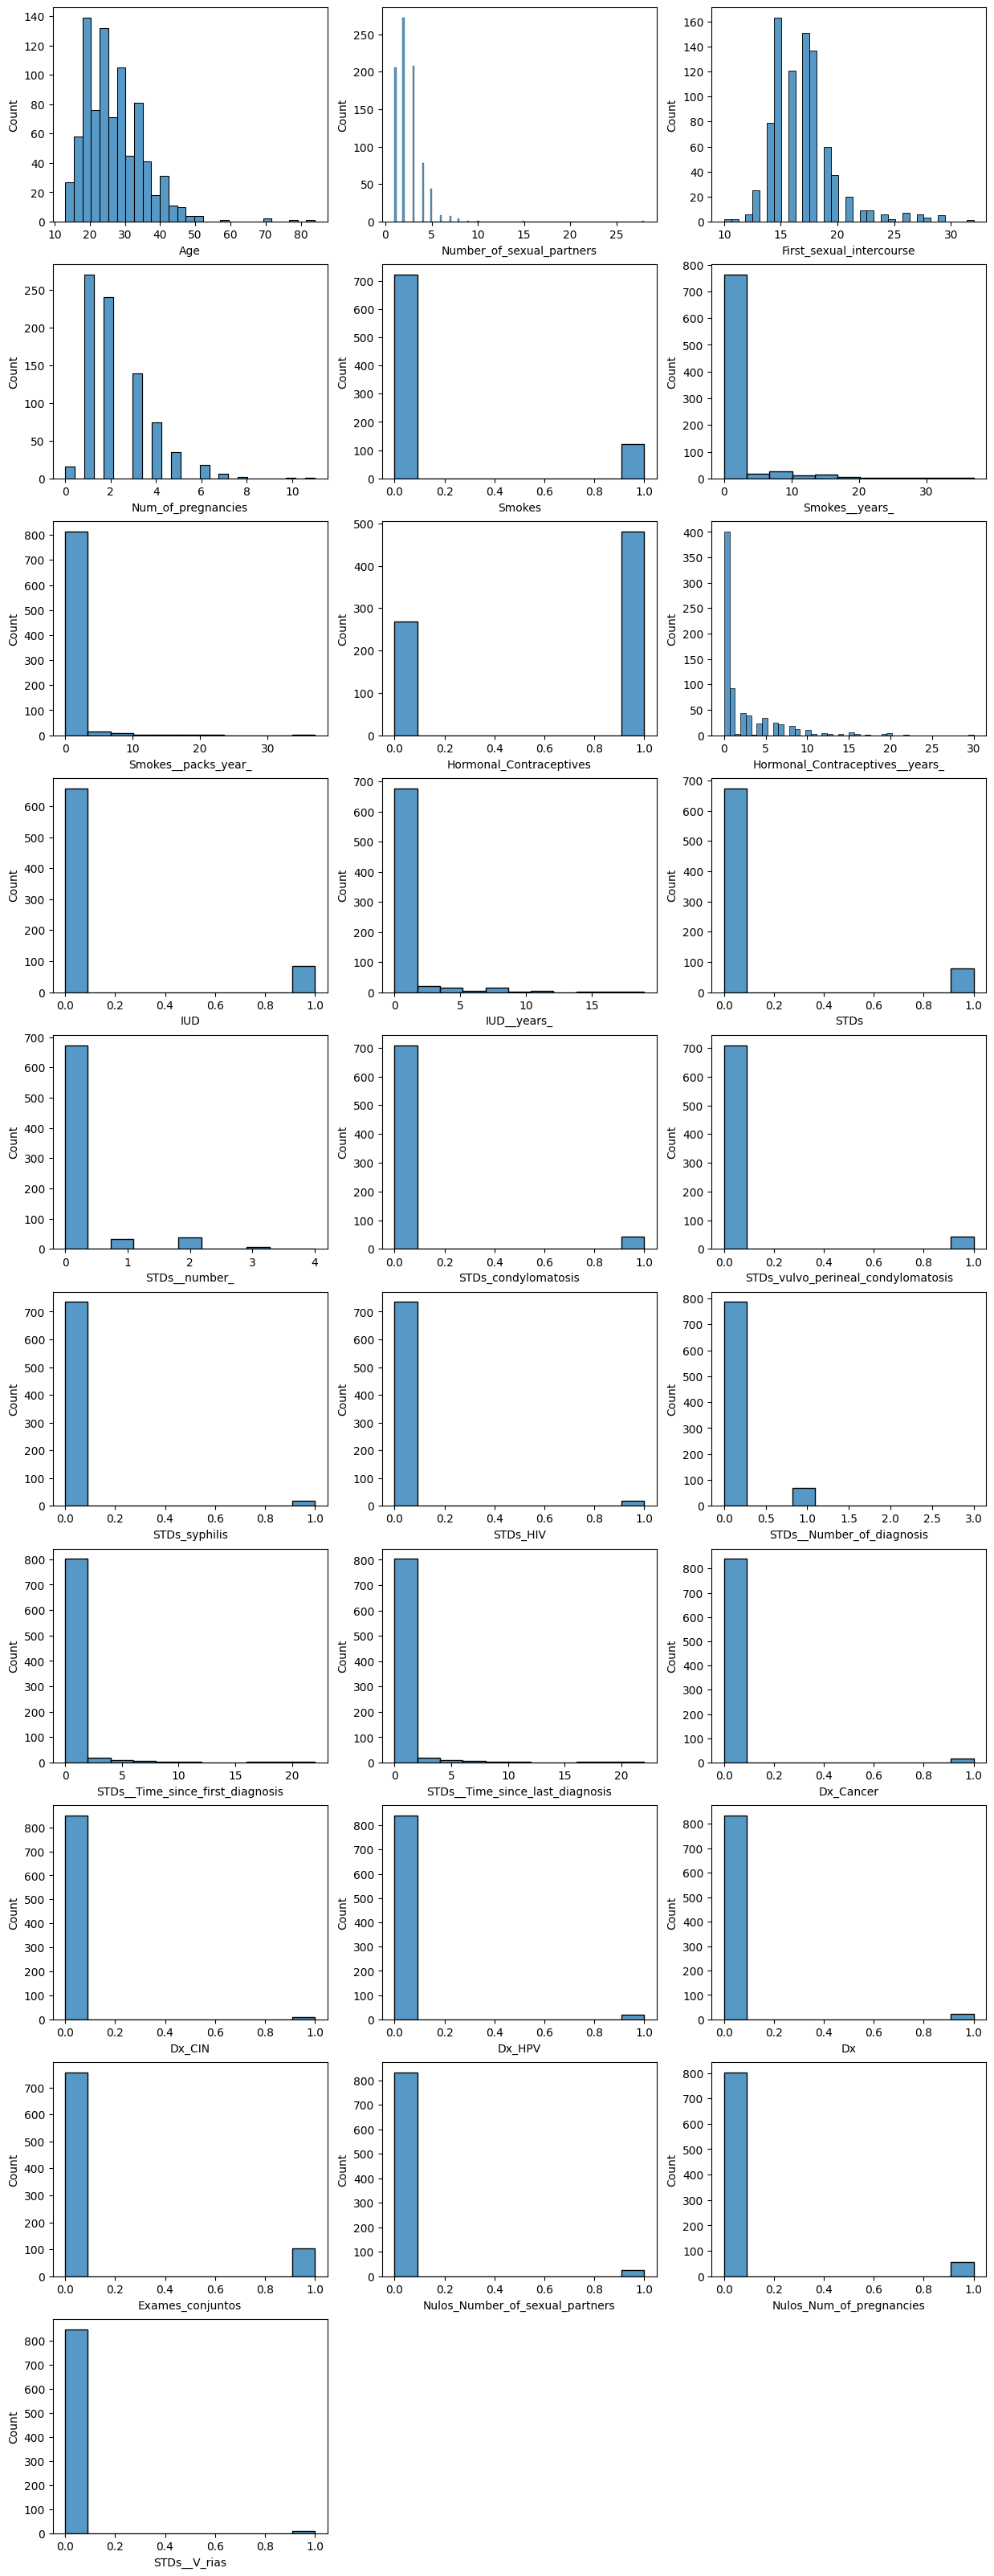

In [ ]:
# Múltiplos histogramas do df_new
to_plot = ['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse',
       'Num_of_pregnancies', 'Smokes', 'Smokes__years_', 'Smokes__packs_year_',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives__years_', 'IUD',
       'IUD__years_', 'STDs', 'STDs__number_', 'STDs_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_HIV',
       'STDs__Number_of_diagnosis', 'STDs__Time_since_first_diagnosis',
       'STDs__Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV',
       'Dx', 'Exames_conjuntos',
       'Nulos_Number_of_sexual_partners', 'Nulos_Num_of_pregnancies',
       'STDs__V_rias']

plt.figure(figsize = (15,45))

for i in enumerate(to_plot):
    plt.subplot(11,3,i[0]+1)
    grafico = sns.histplot(x=i[1],
                data=df_new)
    grafico.set(ylabel="Count")

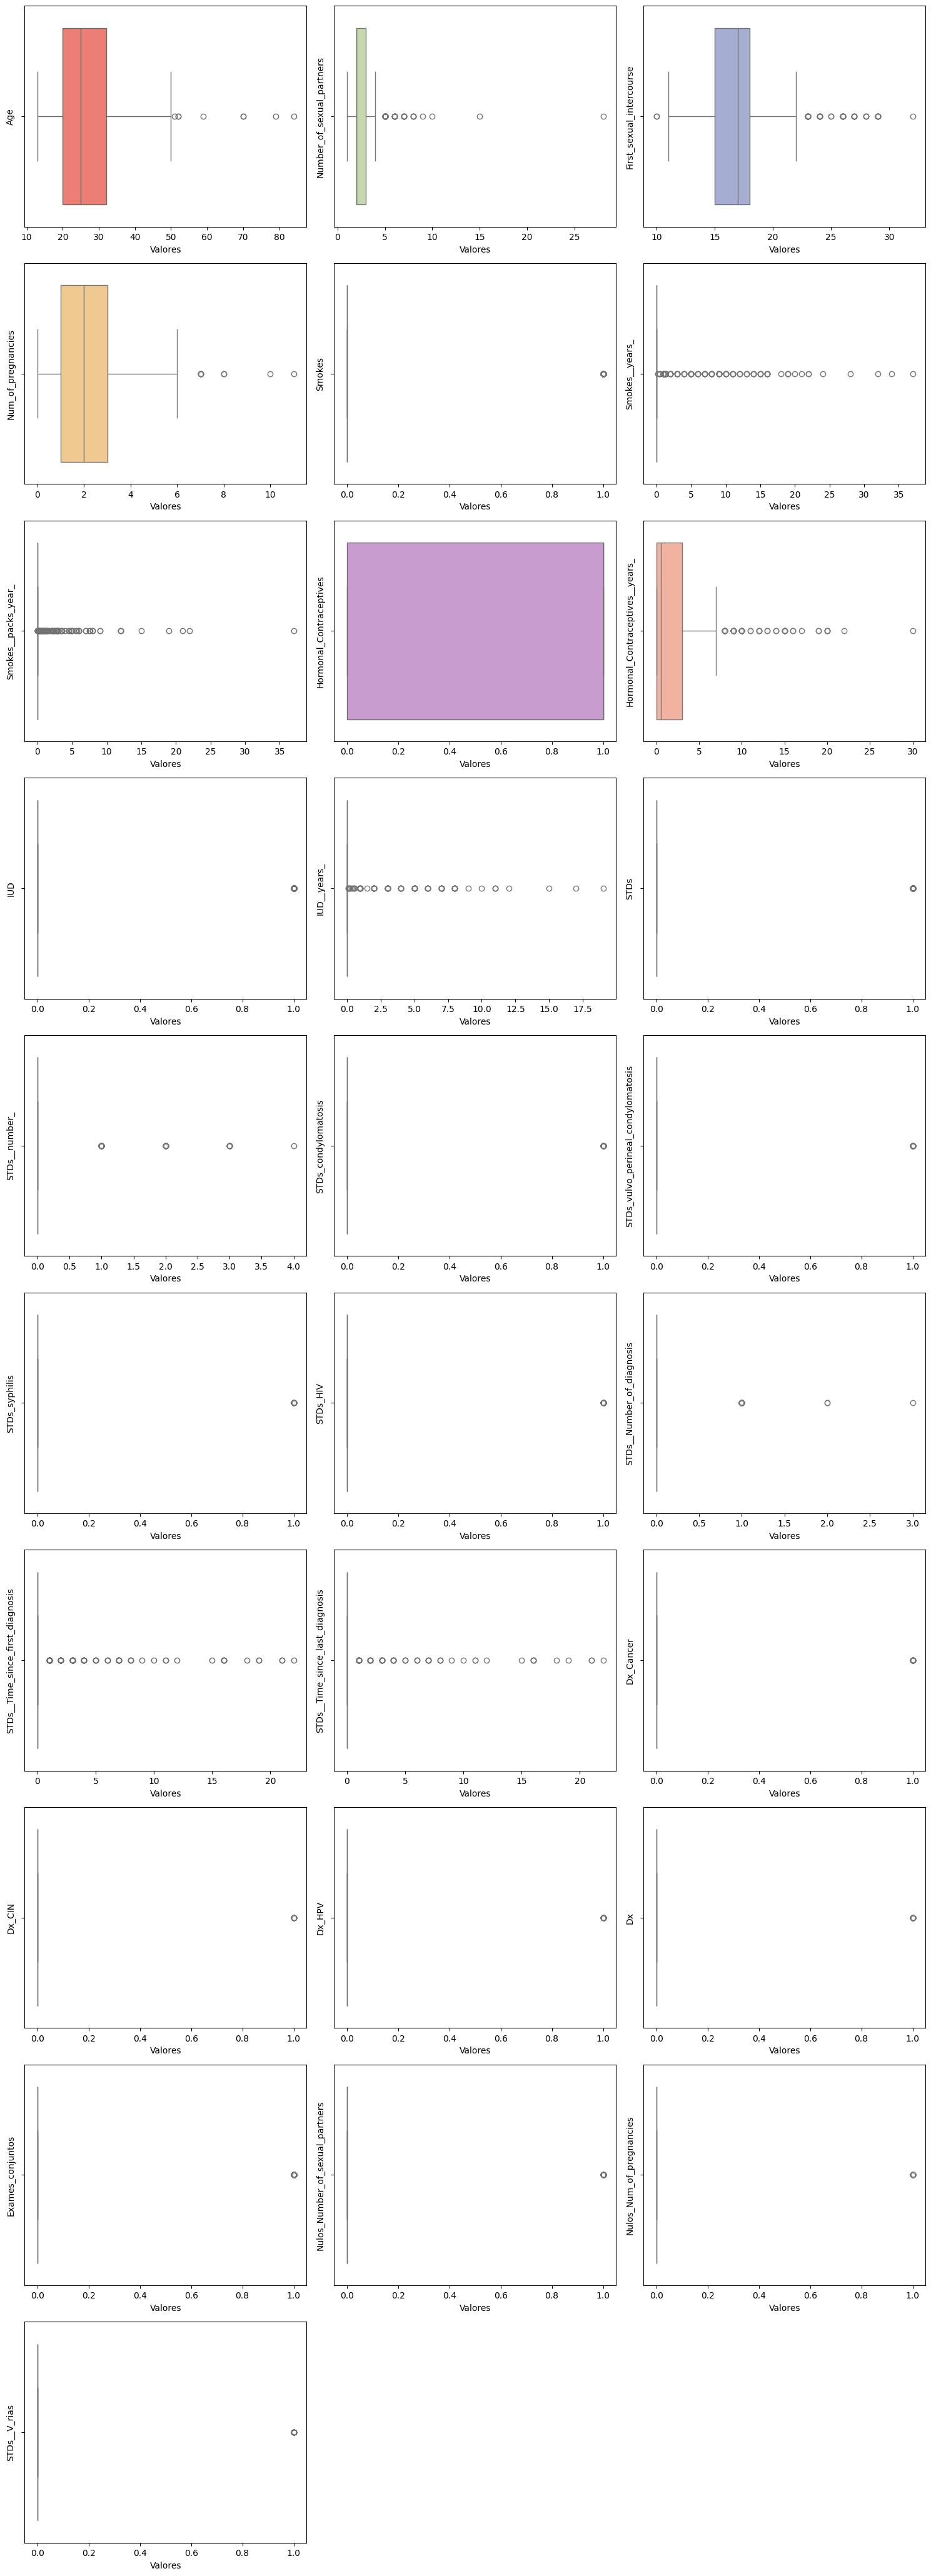

In [ ]:
# Lista das colunas que serão plotadas
to_plot = ['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse',
       'Num_of_pregnancies', 'Smokes', 'Smokes__years_', 'Smokes__packs_year_',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives__years_', 'IUD',
       'IUD__years_', 'STDs', 'STDs__number_', 'STDs_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_HIV',
       'STDs__Number_of_diagnosis', 'STDs__Time_since_first_diagnosis',
       'STDs__Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV',
       'Dx', 'Exames_conjuntos',
       'Nulos_Number_of_sexual_partners', 'Nulos_Num_of_pregnancies',
       'STDs__V_rias']

# Definindo uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5', '#9fa8da', '#ffcc80', '#a5d6a7', '#f48fb1', '#b39ddb', '#ce93d8', '#ffab91']

plt.figure(figsize=(15, 45))

# Loop para criar um boxplot horizontal para cada variável
for i, col in enumerate(to_plot):
    plt.subplot(11, 3, i+1)  # Organiza os gráficos em um grid 10x3
    grafico = sns.boxplot(x=col, data=df_new, orient='h', color=colors[i % len(colors)])  # Aplica cor de forma cíclica
    grafico.set(ylabel=col, xlabel="Valores")

plt.tight_layout()  # Ajusta os gráficos para evitar sobreposição
plt.show()

In [ ]:
correlation_matrix = df_new.corr()

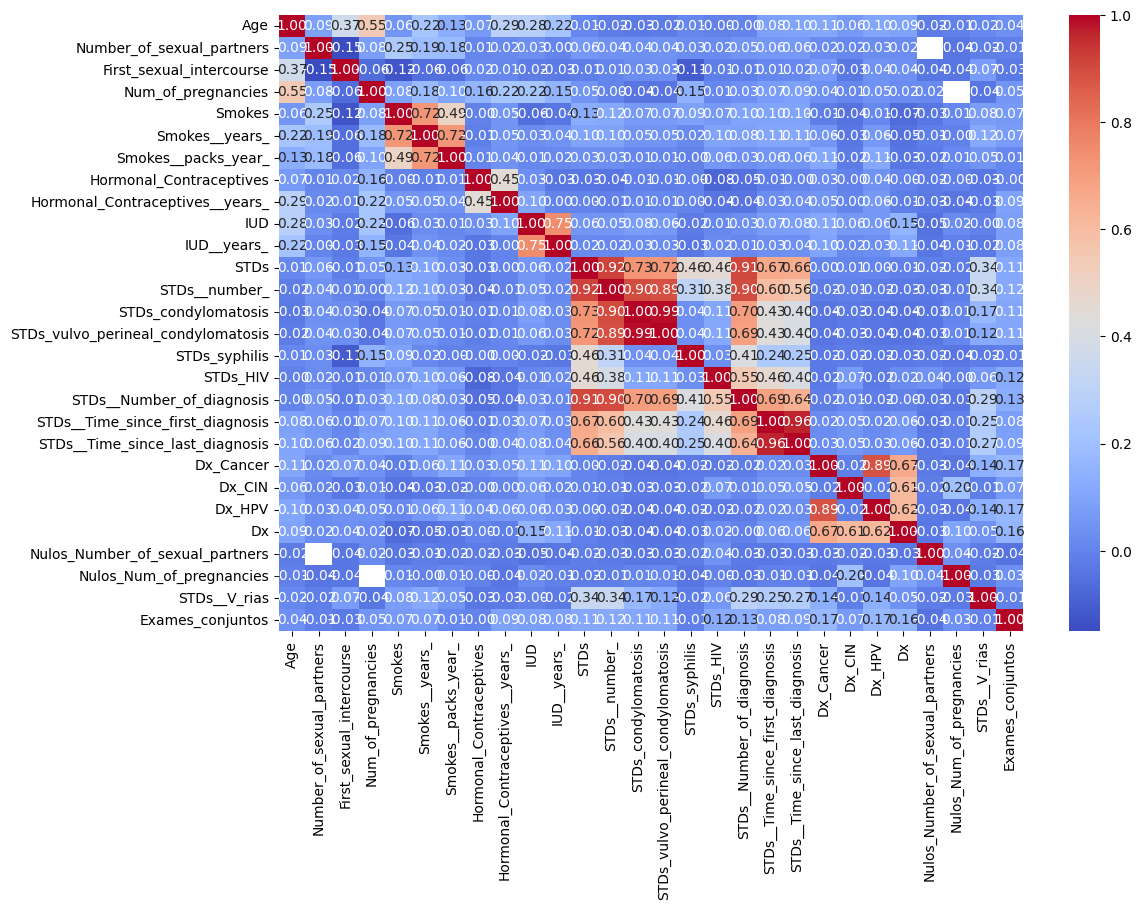

In [ ]:
# Criar um heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Calcular a matriz de correlação apenas para as variáveis com alta colinearidade
corr = df_new[['STDs', 'STDs__number_', 'STDs_condylomatosis',
               'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis',
               'STDs_HIV', 'STDs__Number_of_diagnosis',
               'STDs__Time_since_first_diagnosis',
               'STDs__Time_since_last_diagnosis']].corr()

corr

,STDs,STDs__number_,STDs_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_HIV,STDs__Number_of_diagnosis,STDs__Time_since_first_diagnosis,STDs__Time_since_last_diagnosis
STDs,1.000000,0.918609,0.727645,0.718822,0.457098,0.457098,0.906662,0.665881,0.655736
STDs__number_,0.918609,1.000000,0.899521,0.890699,0.306830,0.384231,0.897233,0.602351,0.561421
STDs_condylomatosis,0.727645,0.899521,1.000000,0.987875,0.035145,0.109276,0.699038,0.431392,0.398292
STDs_vulvo_perineal_condylomatosis,0.718822,0.890699,0.987875,1.000000,0.036422,0.111357,0.690562,0.432870,0.399212
STDs_syphilis,0.457098,0.306830,0.035145,0.036422,1.000000,0.032426,0.412032,0.241589,0.245996
STDs_HIV,0.457098,0.384231,0.109276,0.111357,0.032426,1.000000,0.547506,0.464085,0.402574
STDs__Number_of_diagnosis,0.906662,0.897233,0.699038,0.690562,0.412032,0.547506,1.000000,0.690979,0.641199
STDs__Time_since_first_diagnosis,0.665881,0.602351,0.431392,0.432870,0.241589,0.464085,0.690979,1.000000,0.964986
STDs__Time_since_last_diagnosis,0.655736,0.561421,0.398292,0.399212,0.245996,0.402574,0.641199,0.964986,1.000000


###Tratamento de variáveis com alta colinearidade

*   STDs e STDs__number_: Correlação de 0.919

*   STDs_condylomatosis e STDs_vulvo_perineal_condylomatosis: Correlação de 0.988

*   STDs e STDs__Number_of_diagnosis: Correlação de 0.907

*   STDs__Time_since_first_diagnosis e STDs__Time_since_last_diagnosis: Correlação de 0.931


Escolhi retirar as variaveis STDs, STDs_vulvo_perineal_condylomatosis, STDs__Time_since_last_diagnosis

Motivos:

*   A variável STDs está contida dentro da variável STDs__number_, esta última é mais interessante para o estudo devido apresentar dados mais completos de números de IST de cada sujeito do estudo;
*   A variável STDs_vulvo_perineal_condylomatosis apresenta 1 argumento a menos do que a STDs_condylomatosis
*   A variável STDs__Time_since_last_diagnosis foi mantida no estudo devido o câncer do colo do útero se formar através de lesões não cancerígenas provocadas por tipos de HPV de alto risco, IST.

Para que o câncer do colo do útero se desenvolva em pessoas com sistemas imunológicos normais, são necessários de 15 a 20 anos. Em pessoas com sistemas imunológicos debilitados – as que estão infectadas pelo vírus HIV e sem tratamento –, o desenvolvimento do câncer pode levar apenas de 5 a 10 anos.
[Fonte:OPAS/OMS](https://https://www.paho.org/pt/topicos/hpv-e-cancer-do-colo-do-utero#:~:text=Para%20que%20o%20c%C3%A2ncer%20do,de%205%20a%2010%20anos.)







In [ ]:
# Retirando do dataset 'df_new' variáveis com alta colinearidade
df_new = df_new.drop(['STDs__Time_since_last_diagnosis', 'STDs', 'STDs_vulvo_perineal_condylomatosis'], axis=1) # comando drop. axis = 1 quando a coluna é retirada pelo nome e
                                                                              # axis = 0 quando se deseja retirar a coluna pelo índice.
df_new.head()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes__years_,Smokes__packs_year_,Hormonal_Contraceptives,Hormonal_Contraceptives__years_,IUD,...,STDs__Number_of_diagnosis,STDs__Time_since_first_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Nulos_Number_of_sexual_partners,Nulos_Num_of_pregnancies,STDs__V_rias,Exames_conjuntos
0,18,4.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0,0,0,0,0,0,0.000000,0
1,15,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0,0,0,0,0,0,0.000000,0
2,34,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0,0,0,0,0,0,0.000000,0
3,52,5.000000,16.000000,4.000000,1.000000,37.000000,37.000000,1.000000,3.000000,0.000000,...,0,0.000000,1,0,1,0,0,0,0.000000,0
4,46,3.000000,21.000000,4.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,...,0,0.000000,0,0,0,0,0,0,0.000000,0


In [ ]:
#Criando listas para variáveis do tipo dummy e numéricas
#Retirei a variável 'Biopsy' que será a variável alvo
dummy_features = ['Smokes', 'Hormonal_Contraceptives', 'IUD', 'STDs_condylomatosis', 'STDs_syphilis', 'STDs_HIV', 'Dx_Cancer',
                  'Dx_CIN', 'Dx_HPV', 'Dx', 'Nulos_Number_of_sexual_partners',
                  'Nulos_Num_of_pregnancies', 'STDs__V_rias']

numeric_features = ['Age', 'First_sexual_intercourse', 'Number_of_sexual_partners', 'Num_of_pregnancies',
                    'Smokes__packs_year_', 'Hormonal_Contraceptives__years_', 'IUD__years_', 'STDs__number_',
                    'STDs__Number_of_diagnosis', 'STDs__Time_since_first_diagnosis',  'Smokes__years_']

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas
df_new[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.000000,26.820513,8.497948,13.000000,20.000000,25.000000,32.000000,84.000000
First_sexual_intercourse,851.000000,16.995300,2.803355,10.000000,15.000000,17.000000,18.000000,32.000000
Number_of_sexual_partners,832.000000,2.527644,1.667760,1.000000,2.000000,2.000000,3.000000,28.000000
Num_of_pregnancies,802.000000,2.275561,1.447414,0.000000,1.000000,2.000000,3.000000,11.000000
Smokes__packs_year_,845.000000,0.453144,2.226610,0.000000,0.000000,0.000000,0.000000,37.000000
Hormonal_Contraceptives__years_,750.000000,2.256419,3.764254,0.000000,0.000000,0.500000,3.000000,30.000000
IUD__years_,741.000000,0.514804,1.943089,0.000000,0.000000,0.000000,0.000000,19.000000
STDs__number_,753.000000,0.176627,0.561993,0.000000,0.000000,0.000000,0.000000,4.000000
STDs__Number_of_diagnosis,858.000000,0.087413,0.302545,0.000000,0.000000,0.000000,0.000000,3.000000
STDs__Time_since_first_diagnosis,858.000000,0.508159,2.388333,0.000000,0.000000,0.000000,0.000000,22.000000


In [ ]:
#visualizar estatísticas descritivas para as variáveis dummy
df_new[dummy_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Smokes,845.000000,0.145562,0.352876,0.000000,0.000000,0.000000,0.000000,1.000000
Hormonal_Contraceptives,750.000000,0.641333,0.479929,0.000000,0.000000,1.000000,1.000000,1.000000
IUD,741.000000,0.112011,0.315593,0.000000,0.000000,0.000000,0.000000,1.000000
STDs_condylomatosis,753.000000,0.058433,0.234716,0.000000,0.000000,0.000000,0.000000,1.000000
STDs_syphilis,753.000000,0.023904,0.152853,0.000000,0.000000,0.000000,0.000000,1.000000
STDs_HIV,753.000000,0.023904,0.152853,0.000000,0.000000,0.000000,0.000000,1.000000
Dx_Cancer,858.000000,0.020979,0.143398,0.000000,0.000000,0.000000,0.000000,1.000000
Dx_CIN,858.000000,0.010490,0.101939,0.000000,0.000000,0.000000,0.000000,1.000000
Dx_HPV,858.000000,0.020979,0.143398,0.000000,0.000000,0.000000,0.000000,1.000000
Dx,858.000000,0.027972,0.164989,0.000000,0.000000,0.000000,0.000000,1.000000


### Divisão de treino e teste é necessária fazer para X e Y

### x = variáveis preditoras
### y = variável de desfecho

Eu separei em x1 e y1 porque estava com a ideia de fazer um modelo para cada variável alvo que o estudo que liberou a base de dados apresenta, porém em seguida optei por seguir apenas com a variável 'Biopsy'

In [ ]:
# importando a função train_test_split da biblioteca sklearn.model_selection
from sklearn.model_selection import train_test_split

In [ ]:
#Separando x1 de y1 com a variável alvo Biopsy (Biópsia)
x1_df_new = df_new.drop(columns=['Exames_conjuntos'])
y1_df_new = df_new[['Exames_conjuntos']]

In [ ]:
#verificando a quantidade de variáveis em x1
x1_df_new.shape

(858, 24)

In [ ]:
#verificando a quantidade de variáveis em y1
y1_df_new.shape

(858, 1)

In [ ]:
#modelo com 70% de treino e 30% de teste
# parâmetro random_state para treino e teste ser separado de modo aleatório
# párâmetro stratify para que a divisão seja feita respeitanto a proporção de eventos entre treino e teste (importantíssimo para dados desbalanceados)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_df_new, y1_df_new, test_size=0.3, random_state=42, stratify=y1_df_new)

In [ ]:
#Quantidade de itens em x1 que foram para o treino
x1_train.shape

(600, 24)

In [ ]:
#Quantidade de itens em x1 que foram para o teste
x1_test.shape

(258, 24)

In [ ]:
#Quantidade de itens em y1 que foram para o treino
y1_train.shape

(600, 1)

In [ ]:
#Quantidade de itens em y1 que foram para o teste
y1_test.shape

(258, 1)

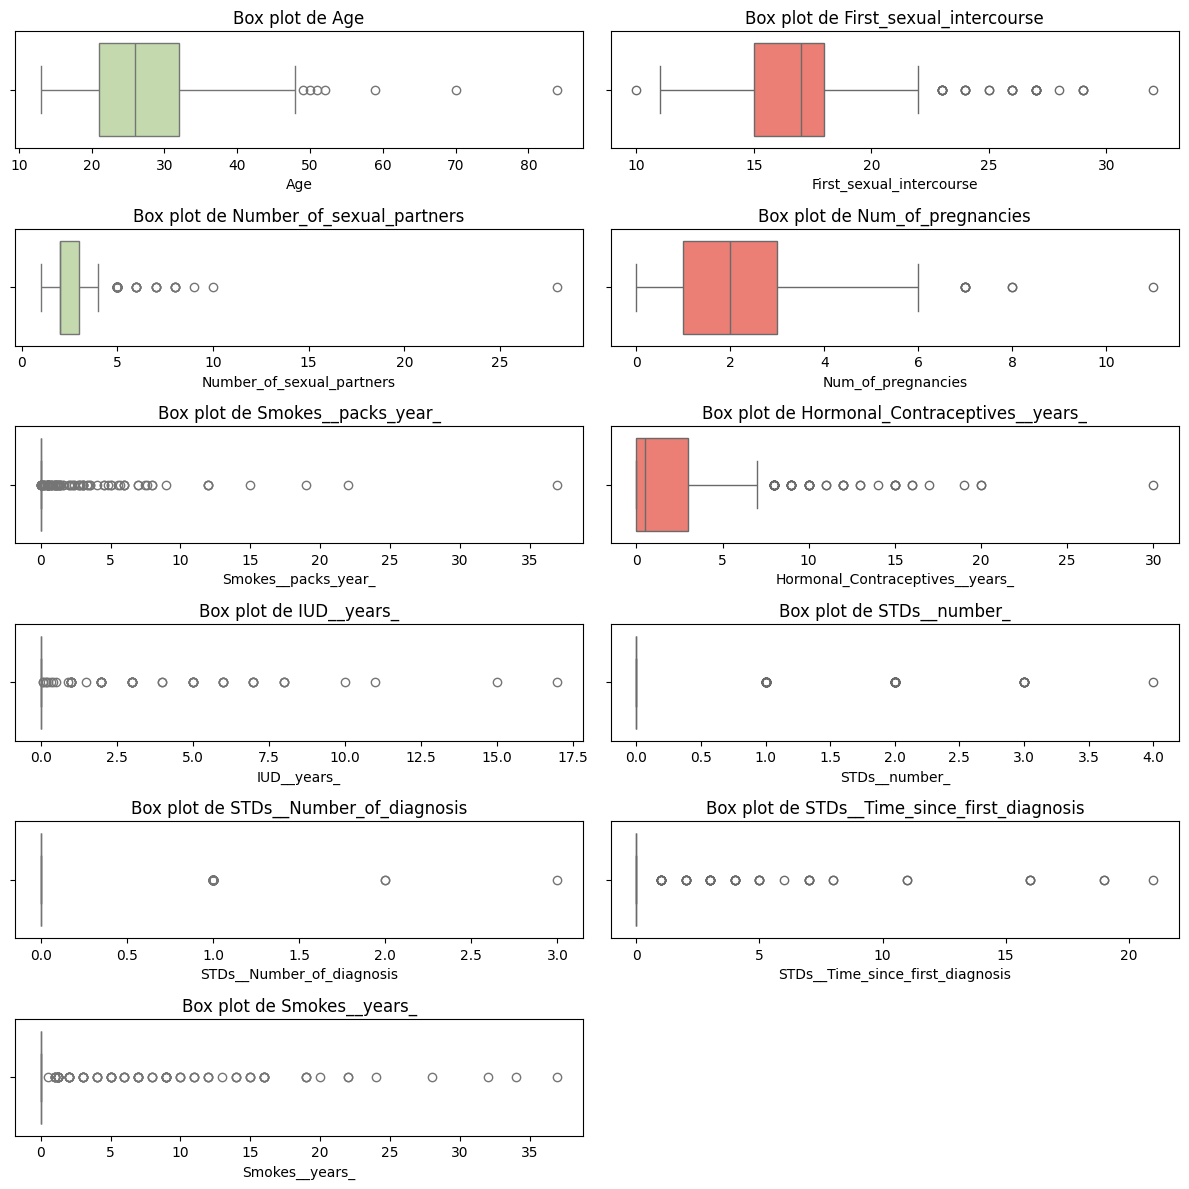

In [ ]:
#Plantando Box Plot para as variáveis numéricas

# Defina uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5']  # Adapte as cores conforme necessário

plt.figure(figsize=(12, 12))  # Ajuste o tamanho da figura para caber 12 gráficos

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(6, 2, i)  # Aqui você cria uma grade de 4 linhas e 2 colunas
    sns.boxplot(x=x1_train[feature], color=colors[i % 2])  # Alterna entre as cores
    plt.title(f'Box plot de {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Veriricando a correlação de Pearson (correlação linear) para as variáveis numéricas
#varia de 1 a -1
#0 é quando não há correlação nenhuma
corr = x1_train[numeric_features].corr()
corr

,Age,First_sexual_intercourse,Number_of_sexual_partners,Num_of_pregnancies,Smokes__packs_year_,Hormonal_Contraceptives__years_,IUD__years_,STDs__number_,STDs__Number_of_diagnosis,STDs__Time_since_first_diagnosis,Smokes__years_
Age,1.000000,0.386111,0.080879,0.543016,0.150805,0.298989,0.206781,-0.008550,-0.008977,0.026405,0.266874
First_sexual_intercourse,0.386111,1.000000,-0.193309,-0.020250,-0.080443,-0.019472,-0.021975,0.013196,-0.011762,0.001842,-0.062254
Number_of_sexual_partners,0.080879,-0.193309,1.000000,0.055866,0.185529,0.005203,0.001012,-0.010491,0.007644,0.021861,0.203593
Num_of_pregnancies,0.543016,-0.020250,0.055866,1.000000,0.118394,0.237837,0.191262,-0.007971,0.012057,0.028666,0.203524
Smokes__packs_year_,0.150805,-0.080443,0.185529,0.118394,1.000000,0.066938,-0.025540,0.031265,0.031633,0.077068,0.734883
Hormonal_Contraceptives__years_,0.298989,-0.019472,0.005203,0.237837,0.066938,1.000000,0.037137,-0.009084,-0.061471,-0.022379,0.067048
IUD__years_,0.206781,-0.021975,0.001012,0.191262,-0.025540,0.037137,1.000000,0.023159,0.007856,0.012500,0.006161
STDs__number_,-0.008550,0.013196,-0.010491,-0.007971,0.031265,-0.009084,0.023159,1.000000,0.891382,0.610009,0.103821
STDs__Number_of_diagnosis,-0.008977,-0.011762,0.007644,0.012057,0.031633,-0.061471,0.007856,0.891382,1.000000,0.695565,0.086754
STDs__Time_since_first_diagnosis,0.026405,0.001842,0.021861,0.028666,0.077068,-0.022379,0.012500,0.610009,0.695565,1.000000,0.132308


In [ ]:
#criando uma tabela com as frequências das colunas dummy_features
for feature in dummy_features:
  tab = x1_train[feature].value_counts()
  print(tab)
  print(end='\n') #\n = símbolo de espaço

Smokes
0.000000    497
1.000000     95
Name: count, dtype: int64

Hormonal_Contraceptives
1.000000    345
0.000000    178
Name: count, dtype: int64

IUD
0.000000    460
1.000000     56
Name: count, dtype: int64

STDs_condylomatosis
0.000000    496
1.000000     29
Name: count, dtype: int64

STDs_syphilis
0.000000    512
1.000000     13
Name: count, dtype: int64

STDs_HIV
0.000000    509
1.000000     16
Name: count, dtype: int64

Dx_Cancer
0    589
1     11
Name: count, dtype: int64

Dx_CIN
0    595
1      5
Name: count, dtype: int64

Dx_HPV
0    588
1     12
Name: count, dtype: int64

Dx
0    587
1     13
Name: count, dtype: int64

Nulos_Number_of_sexual_partners
0    583
1     17
Name: count, dtype: int64

Nulos_Num_of_pregnancies
0    560
1     40
Name: count, dtype: int64

STDs__V_rias
0.000000    593
1.000000      7
Name: count, dtype: int64



In [ ]:
#Imputando dados faltantes em variáveis númericas pela média

# Lista de variáveis numéricas que possuem dados faltantes (excluindo 'Age' e 'STDs: Number of diagnosis')
numeric_features_to_impute = [col for col in numeric_features if col not in ['Age', 'STDs: Number of diagnosis']]

# Imputar valores faltantes nas variáveis numéricas restantes pela média
x1_train[numeric_features_to_impute] = x1_train[numeric_features_to_impute].fillna(x1_train[numeric_features_to_impute].mean())

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a imputação de dados
x1_train[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,600.000000,26.843333,8.315891,13.000000,21.000000,26.000000,32.000000,84.000000
First_sexual_intercourse,600.000000,17.001678,2.789498,10.000000,15.000000,17.000000,18.000000,32.000000
Number_of_sexual_partners,600.000000,2.560892,1.702198,1.000000,2.000000,2.000000,3.000000,28.000000
Num_of_pregnancies,600.000000,2.278571,1.396719,0.000000,1.000000,2.000000,3.000000,11.000000
Smokes__packs_year_,600.000000,0.549388,2.448504,0.000000,0.000000,0.000000,0.000000,37.000000
Hormonal_Contraceptives__years_,600.000000,2.252303,3.494961,0.000000,0.000000,1.000000,2.252303,30.000000
IUD__years_,600.000000,0.423236,1.567248,0.000000,0.000000,0.000000,0.000000,17.000000
STDs__number_,600.000000,0.177143,0.539779,0.000000,0.000000,0.000000,0.000000,4.000000
STDs__Number_of_diagnosis,600.000000,0.086667,0.309810,0.000000,0.000000,0.000000,0.000000,3.000000
STDs__Time_since_first_diagnosis,600.000000,0.446667,2.128703,0.000000,0.000000,0.000000,0.000000,21.000000


In [ ]:
#Importando a função stats da biblioteca scipy
#Para imputação de dados pela moda
from scipy import stats

In [ ]:
#Imputando dados faltantes em variáveis dummy pela moda

# Variáveis dummy com dados faltantes
dummy_features_with_missing = ['Smokes', 'Hormonal_Contraceptives', 'IUD', 'STDs_condylomatosis', 'STDs_syphilis', 'STDs_HIV']

# Imputar valores faltantes nas variáveis dummy pela moda
for feature in dummy_features_with_missing:
    mode_value = x1_train[feature].mode()[0]  # Obtém a moda (valor mais frequente)
    x1_train[feature].fillna(mode_value, inplace=True)

<ipython-input-361-d8ba6377330e>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# verificando valores ausentes para cada variável de x1_train após imputação de dados nas variáveis numéricas e dummy
x1_train.isna().sum()

,0
Age,0
Number_of_sexual_partners,0
First_sexual_intercourse,0
Num_of_pregnancies,0
Smokes,0
Smokes__years_,0
Smokes__packs_year_,0
Hormonal_Contraceptives,0
Hormonal_Contraceptives__years_,0
IUD,0


In [ ]:
#importando a função StandardScaler da biblioteca sklearn
#para padronização!
from sklearn.preprocessing import StandardScaler

In [ ]:
# Criação do StandardScaler
s_scaler = StandardScaler()

# Ajustar o scaler aos dados
s_scaler.fit(x1_train[numeric_features])

# Transformar os dados e substituir no dataset
x1_train[numeric_features] = s_scaler.transform(x1_train[numeric_features])

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a padronização
x1_train[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,600.000000,-0.000000,1.000834,-1.666073,-0.703257,-0.101497,0.620615,6.878921
First_sexual_intercourse,600.000000,-0.000000,1.000834,-2.512108,-0.718175,-0.000602,0.358185,5.381196
Number_of_sexual_partners,600.000000,0.000000,1.000834,-0.917751,-0.329785,-0.329785,0.258181,14.957332
Num_of_pregnancies,600.000000,0.000000,1.000834,-1.632736,-0.916175,-0.199613,0.516948,6.249438
Smokes__packs_year_,600.000000,-0.000000,1.000834,-0.224564,-0.224564,-0.224564,-0.224564,14.899311
Hormonal_Contraceptives__years_,600.000000,0.000000,1.000834,-0.644981,-0.644981,-0.358616,0.000000,7.945969
IUD__years_,600.000000,0.000000,1.000834,-0.270276,-0.270276,-0.270276,-0.270276,10.585811
STDs__number_,600.000000,0.000000,1.000834,-0.328450,-0.328450,-0.328450,-0.328450,7.088168
STDs__Number_of_diagnosis,600.000000,0.000000,1.000834,-0.279975,-0.279975,-0.279975,-0.279975,9.411461
STDs__Time_since_first_diagnosis,600.000000,0.000000,1.000834,-0.210006,-0.210006,-0.210006,-0.210006,9.663390


###Padronização dos dados do teste

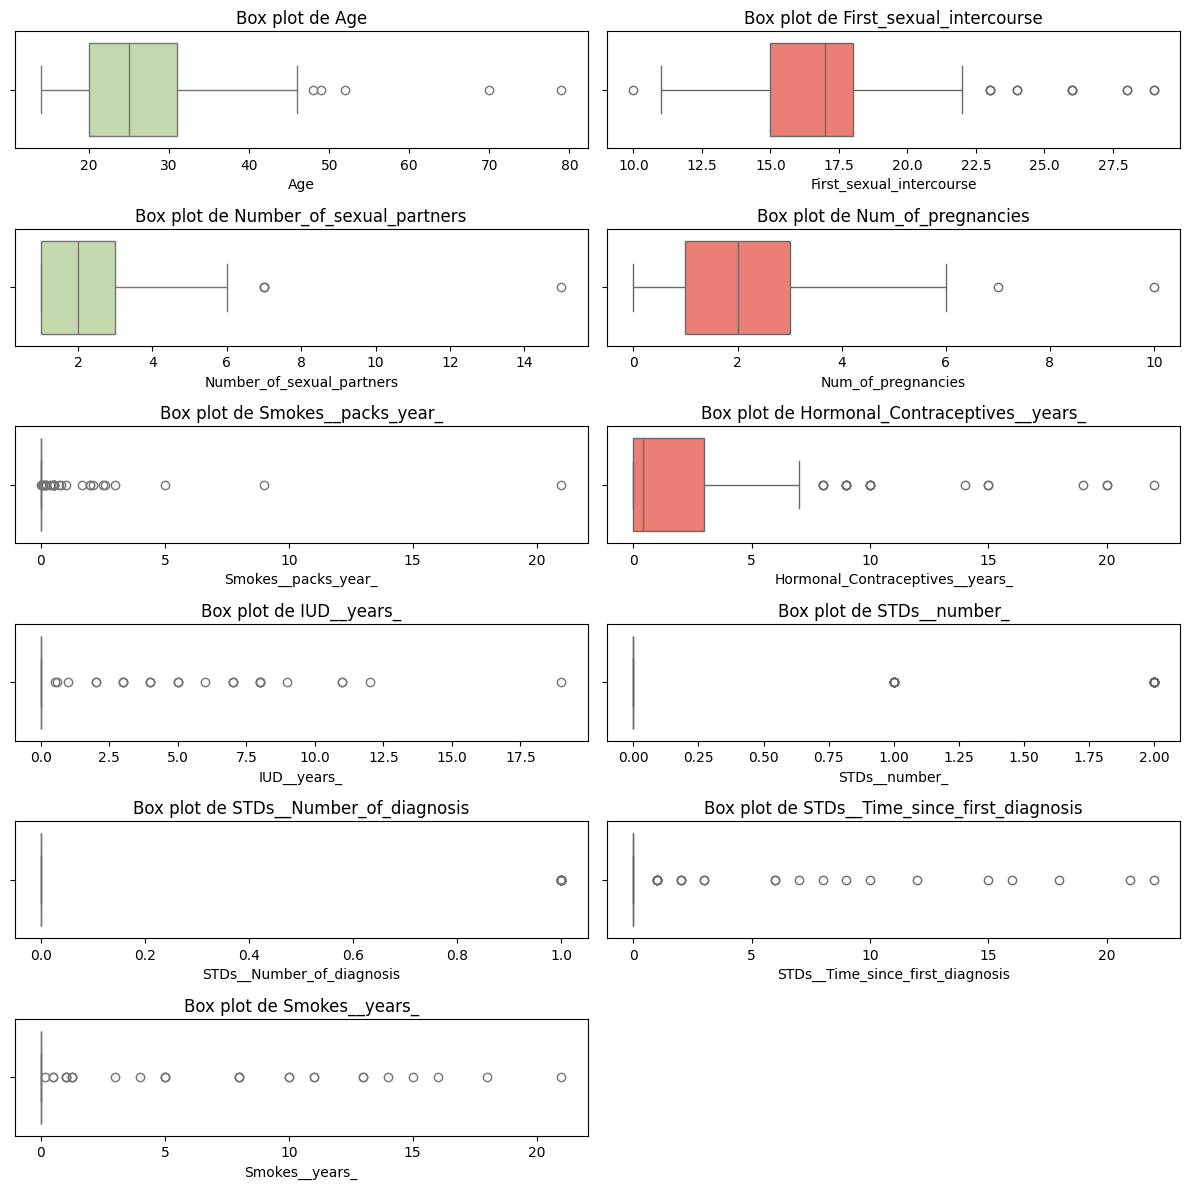

In [ ]:
#Plantando Box Plot para as variáveis numéricas

# Defina uma lista de cores para os box plots
colors = ['#ff6f61', '#c5e1a5']  # Adapte as cores conforme necessário

plt.figure(figsize=(12, 12))  # Ajuste o tamanho da figura para caber 12 gráficos

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(6, 2, i)  # Aqui você cria uma grade de 4 linhas e 2 colunas
    sns.boxplot(x=x1_test[feature], color=colors[i % 2])  # Alterna entre as cores
    plt.title(f'Box plot de {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Veriricando a correlação de Pearson (correlação linear) para as variáveis numéricas
#varia de 1 a -1
#0 é quando não há correlação nenhuma
corr = x1_test[numeric_features].corr()
corr

,Age,First_sexual_intercourse,Number_of_sexual_partners,Num_of_pregnancies,Smokes__packs_year_,Hormonal_Contraceptives__years_,IUD__years_,STDs__number_,STDs__Number_of_diagnosis,STDs__Time_since_first_diagnosis,Smokes__years_
Age,1.000000,0.335509,0.099124,0.562726,0.078519,0.270368,0.235650,-0.034491,0.015805,0.179927,0.080591
First_sexual_intercourse,0.335509,1.000000,-0.038754,-0.152523,0.023812,0.068931,-0.036001,-0.009086,-0.017267,0.024533,-0.054097
Number_of_sexual_partners,0.099124,-0.038754,1.000000,0.141116,0.151816,0.056699,0.013915,0.190687,0.179611,0.133268,0.099690
Num_of_pregnancies,0.562726,-0.152523,0.141116,1.000000,0.045865,0.195750,0.105038,0.026451,0.090054,0.157237,0.113695
Smokes__packs_year_,0.078519,0.023812,0.151816,0.045865,1.000000,-0.047187,0.144348,0.040173,0.045459,0.027497,0.660346
Hormonal_Contraceptives__years_,0.270368,0.068931,0.056699,0.195750,-0.047187,1.000000,-0.055854,-0.002862,0.016145,0.110896,0.002709
IUD__years_,0.235650,-0.036001,0.013915,0.105038,0.144348,-0.055854,1.000000,0.002568,0.006543,0.047057,0.135237
STDs__number_,-0.034491,-0.009086,0.190687,0.026451,0.040173,-0.002862,0.002568,1.000000,0.913416,0.620703,0.083510
STDs__Number_of_diagnosis,0.015805,-0.017267,0.179611,0.090054,0.045459,0.016145,0.006543,0.913416,1.000000,0.718257,0.083181
STDs__Time_since_first_diagnosis,0.179927,0.024533,0.133268,0.157237,0.027497,0.110896,0.047057,0.620703,0.718257,1.000000,0.081647


In [ ]:
#criando uma tabela com as frequências das colunas dummy_features
for feature in dummy_features:
  tab = x1_test[feature].value_counts()
  print(tab)
  print(end='\n') #\n = símbolo de espaço

Smokes
0.000000    225
1.000000     28
Name: count, dtype: int64

Hormonal_Contraceptives
1.000000    136
0.000000     91
Name: count, dtype: int64

IUD
0.000000    198
1.000000     27
Name: count, dtype: int64

STDs_condylomatosis
0.000000    213
1.000000     15
Name: count, dtype: int64

STDs_syphilis
0.000000    223
1.000000      5
Name: count, dtype: int64

STDs_HIV
0.000000    226
1.000000      2
Name: count, dtype: int64

Dx_Cancer
0    251
1      7
Name: count, dtype: int64

Dx_CIN
0    254
1      4
Name: count, dtype: int64

Dx_HPV
0    252
1      6
Name: count, dtype: int64

Dx
0    247
1     11
Name: count, dtype: int64

Nulos_Number_of_sexual_partners
0    249
1      9
Name: count, dtype: int64

Nulos_Num_of_pregnancies
0    242
1     16
Name: count, dtype: int64

STDs__V_rias
0.000000    255
1.000000      3
Name: count, dtype: int64



In [ ]:
#Imputando dados faltantes em variáveis númericas pela média

# Lista de variáveis numéricas que possuem dados faltantes (excluindo 'Age' e 'STDs: Number of diagnosis')
numeric_features_to_impute = [col for col in numeric_features if col not in ['Age', 'STDs__Number_of_diagnosis']]

# Imputar valores faltantes nas variáveis numéricas restantes pela média
x1_test[numeric_features_to_impute] = x1_test[numeric_features_to_impute].fillna(x1_test[numeric_features_to_impute].mean())

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a imputação de dados
x1_test[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,258.000000,26.767442,8.923376,14.000000,20.000000,25.000000,31.000000,79.000000
First_sexual_intercourse,258.000000,16.980392,2.802793,10.000000,15.000000,17.000000,18.000000,29.000000
Number_of_sexual_partners,258.000000,2.449799,1.493986,1.000000,1.000000,2.000000,3.000000,15.000000
Num_of_pregnancies,258.000000,2.268595,1.408066,0.000000,1.000000,2.000000,3.000000,10.000000
Smokes__packs_year_,258.000000,0.227940,1.495717,0.000000,0.000000,0.000000,0.000000,21.000000
Hormonal_Contraceptives__years_,258.000000,2.265903,3.581388,0.000000,0.000000,1.000000,3.000000,22.000000
IUD__years_,258.000000,0.724800,2.256324,0.000000,0.000000,0.000000,0.000000,19.000000
STDs__number_,258.000000,0.175439,0.495043,0.000000,0.000000,0.000000,0.000000,2.000000
STDs__Number_of_diagnosis,258.000000,0.089147,0.285510,0.000000,0.000000,0.000000,0.000000,1.000000
STDs__Time_since_first_diagnosis,258.000000,0.651163,2.903510,0.000000,0.000000,0.000000,0.000000,22.000000


In [ ]:
#Imputando dados faltantes em variáveis dummy pela moda

# Variáveis dummy com dados faltantes
dummy_features_with_missing = ['Smokes', 'Hormonal_Contraceptives', 'IUD', 'STDs_condylomatosis', 'STDs_syphilis', 'STDs_HIV']

# Imputar valores faltantes nas variáveis dummy pela moda
for feature in dummy_features_with_missing:
    mode_value = x1_test[feature].mode()[0]  # Obtém a moda (valor mais frequente)
    x1_test[feature].fillna(mode_value, inplace=True)

<ipython-input-371-5b469f82c0bc>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# verificando valores ausentes para cada variável de x1_test após imputação de dados nas variáveis numéricas e dummy
x1_test.isna().sum()

,0
Age,0
Number_of_sexual_partners,0
First_sexual_intercourse,0
Num_of_pregnancies,0
Smokes,0
Smokes__years_,0
Smokes__packs_year_,0
Hormonal_Contraceptives,0
Hormonal_Contraceptives__years_,0
IUD,0


In [ ]:
# Ajustar o scaler aos dados
s_scaler.fit(x1_test[numeric_features])

# Transformar os dados e substituir no dataset
x1_test[numeric_features] = s_scaler.transform(x1_test[numeric_features])

In [ ]:
#visualizar estatísticas descritivas para as variáveis numéricas após a padronização
x1_test[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,258.000000,0.000000,1.001944,-1.433567,-0.759869,-0.198454,0.475244,5.864830
First_sexual_intercourse,258.000000,-0.000000,1.001944,-2.495353,-0.707951,0.007009,0.364490,4.296774
Number_of_sexual_partners,258.000000,-0.000000,1.001944,-0.972310,-0.972310,-0.301658,0.368993,8.416808
Num_of_pregnancies,258.000000,0.000000,1.001944,-1.614274,-0.902699,-0.191125,0.520449,5.501468
Smokes__packs_year_,258.000000,-0.000000,1.001944,-0.152691,-0.152691,-0.152691,-0.152691,13.914690
Hormonal_Contraceptives__years_,258.000000,0.000000,1.001944,-0.633918,-0.633918,-0.354154,0.205374,5.520891
IUD__years_,258.000000,0.000000,1.001944,-0.321855,-0.321855,-0.321855,-0.321855,8.115290
STDs__number_,258.000000,0.000000,1.001944,-0.355079,-0.355079,-0.355079,-0.355079,3.692823
STDs__Number_of_diagnosis,258.000000,-0.000000,1.001944,-0.312846,-0.312846,-0.312846,-0.312846,3.196465
STDs__Time_since_first_diagnosis,258.000000,0.000000,1.001944,-0.224703,-0.224703,-0.224703,-0.224703,7.367061


###Modelos de ML:

In [ ]:
# instalando a biblioteca catboost
!pip install catboost -q

# instalando a biblioteca lightgbm
!pip install lightgbm -q

# instalando a biblioteca xgboost
!pip install xgboost -q

In [ ]:
# importando a função RandomForestClassifier da biblioteca sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# importando as funções accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# da biblioteca sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# importando a função cross_val_score da biblioteca sklearn.model_selection
from sklearn.model_selection import cross_val_score

# importando a função XGBClassifier da biblioteca xgboost
from xgboost import XGBClassifier

# importando a função CatBoostClassifier da biblioteca catboost
from catboost import CatBoostClassifier

# importando a função LGBMClassifier da biblioteca lightgbm
from lightgbm import LGBMClassifier

# importando a função GridSearchCV da biblioteca sklearn.model_selection
from sklearn.model_selection import GridSearchCV

###Modelo Random Forest

Não lê linhas com dados faltantes (missing)

In [ ]:
# Instancia o classificador RandomForest
rf=RandomForestClassifier(random_state=42)

# Treina o modelo com os dados de treinamento
rf.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=42)

In [ ]:
# default do número de estimadores (árvores)
rf.n_estimators

100

In [ ]:
# default do critério de divisão dos nós
rf.criterion

'gini'

In [ ]:
# default do número de variáveis usadas para cada árvores
rf.max_features

'sqrt'

###Otimização do Random Forest com GridSearchCV

Processo de ajustar os hiperparâmetros do modelo de Random Forest para encontrar a melhor combinação que maximize o desempenho preditivo. O GridSearchCV faz isso de forma sistemática, testando exaustivamente várias combinações de hiperparâmetros e avaliando cada uma com validação cruzada.

In [ ]:
# Instancia o classificador RandomForest
#repetido, pois já foi feito acima
rf=RandomForestClassifier(random_state=42)

In [ ]:
# Definir a grade (ou range) de hiperparâmetros para o RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [2, 3, 4, 5, 6]
}

In [ ]:
# Definir a semente aleatória
np.random.seed(42)

In [ ]:
# busca dos hiperparâmetros usando todas as combinações propostas
# o modelo será treinado 5 vezes, será usada a média da métrica AUC para cada combinação
# no fit indicamos quais os dados serão usados, nesse momento será o treino
# o best_params_ mostrará qual foi a melhor combinação

# Converte y1_train em um array NumPy e aplica o ravel() para corrigir a dimensionalidade 2D para 1D
y1_train_ravel = y1_train.values.ravel()

# Instancia o GridSearchCV com validação cruzada e AUC como métrica
grid_search = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', return_train_score=True)

# Treinar o modelo com GridSearchCV
grid_search.fit(x1_train, y1_train_ravel)

#mostrar o melhor desempenho de hiperparâmetro
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
rf=RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=100, random_state=42)
rf.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_rf = rf.predict(x1_test)
y1_prob_rf = rf.predict_proba(x1_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
recall_rf = recall_score(y1_test, y1_pred_rf)
precision_rf = precision_score(y1_test, y1_pred_rf)
f1_rf = f1_score(y1_test, y1_pred_rf)
auc_rf = roc_auc_score(y1_test, y1_prob_rf)

print(f'Random Forest - Recall:', round(recall_rf, 3))
print(f'Random Forest - Precision:', round(precision_rf, 3))
print(f'Random Forest - F1:', round(f1_rf, 3))
print(f'Random Forest - ROC AUC:', round(auc_rf, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest - Recall: 0.032
Random Forest - Precision: 0.25
Random Forest - F1: 0.057
Random Forest - ROC AUC: 0.628


In [ ]:
#visualizando o que tem no y1_test
y1_test

,Exames_conjuntos
694,0
850,0
97,0
697,0
500,0
...,...
244,0
272,0
511,0
438,0


In [ ]:
#contagem de itens separadas no teste para a variável alvo
y1_test.value_counts()

,count
Exames_conjuntos,
0,227
1,31


In [ ]:
 #convertendo a a variável y1_pred_rf (que contém as previsões do modelo) em uma série do pandas
pd.Series(y1_pred_rf).value_counts()

,count
0,254
1,4


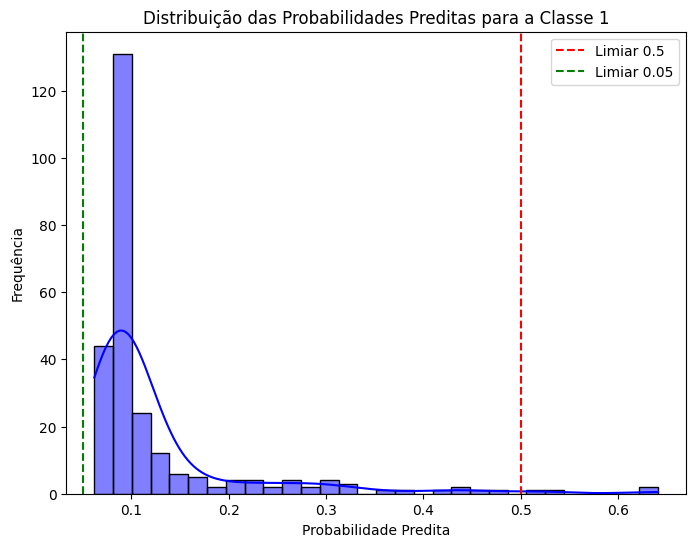

In [ ]:
# Obtendo as probabilidades preditas para a classe 1
y1_prob_rf = rf.predict_proba(x1_test)[:, 1]

# Plotando o histograma
plt.figure(figsize=(8, 6))
sns.histplot(y1_prob_rf, bins=30, kde=True, color='blue')
plt.title('Distribuição das Probabilidades Preditas para a Classe 1')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência')
plt.axvline(0.5, color='red', linestyle='--', label='Limiar 0.5')
plt.axvline(0.05, color='green', linestyle='--', label='Limiar 0.05')
plt.legend()
plt.show()

In [ ]:
#Outra opção
import plotly.express as px

# Converter para séries 1D do Pandas
y1_prob_rf_series = pd.Series(y1_prob_rf.squeeze())
y1_test_series = pd.Series(y1_test.squeeze())

# Criar o histograma
px.histogram(y1_prob_rf_series, color=y1_test_series, barmode="group", histnorm="percent")

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV (com os melhores hiperparâmetros)
rf=RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=100, random_state=42)
rf.fit(x1_train, y1_train)

# Predizendo os valores na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_rf = rf.predict(x1_test)
y1_pred_rf = rf.predict_proba(x1_test)[:, 1] > 0.08 #melhor limiar encontrado para o modelo
y1_prob_rf = rf.predict_proba(x1_test)[:, 1]

# Calculando as métricas de desempenho
# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
recall_rf = recall_score(y1_test, y1_pred_rf)
precision_rf = precision_score(y1_test, y1_pred_rf)
f1_rf = f1_score(y1_test, y1_pred_rf)
auc_rf = roc_auc_score(y1_test, y1_prob_rf)

# Exibindo os resultados das métricas
print(f'Random Forest - Recall:', round(recall_rf, 3))
print(f'Random Forest - Precision:', round(precision_rf, 3))
print(f'Random Forest - F1:', round(f1_rf, 3))
print(f'Random Forest - ROC AUC:', round(auc_rf, 3))

Random Forest - Recall: 1.0
Random Forest - Precision: 0.14
Random Forest - F1: 0.246
Random Forest - ROC AUC: 0.628


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



### XGBoost

In [ ]:
# criando o modelo
xgb=XGBClassifier(random_state=42)

In [ ]:
# definindo as possibilidades ou range para alguns hiperparâmetros do XGBoost
grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'eta': [0.01, 0.05, 0.1]
}

In [ ]:
# busca dos hiperparâmetros usando todas as combinações propostas
# o modelo será treinado 5 vezes, será usada a média da métrica AUC para cada combinação
# no fit indicamos quais os dados serão usados, nesse momento será o treino
# o best_params_ mostrará qual foi a melhor combinação

grid_search = GridSearchCV(xgb, grid_xgboost, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x1_train, y1_train)
grid_search.best_params_

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
xgb=XGBClassifier(eta=0.1, max_depth=3, n_estimators=50, random_state=42)
xgb.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_xgb = xgb.predict(x1_test)
y1_pred_xgb = xgb.predict_proba(x1_test)[:, 1] > 0.05 #melhor limiar encontrado para o modelo
y1_prob_xgb = xgb.predict_proba(x1_test)[:, 1] #pedindo a probabilidade de 1

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
auc_xgb = roc_auc_score(y1_test, y1_prob_xgb)
recall_xgb = recall_score(y1_test, y1_pred_xgb)
precision_xgb = precision_score(y1_test, y1_pred_xgb)
f1_xgb = f1_score(y1_test, y1_pred_xgb)

print(f'XGBoost - Recall:', round(recall_xgb, 3))
print(f'XGBoost - Precision:', round(precision_xgb, 3))
print(f'XGBoost - F1:', round(f1_xgb, 3))
print(f'XGBoost - ROC AUC:', auc_xgb)

XGBoost - Recall: 1.0
XGBoost - Precision: 0.129
XGBoost - F1: 0.229
XGBoost - ROC AUC: 0.6333664914025864


###CatBoost

In [ ]:
# criando o modelo
cat = CatBoostClassifier(eval_metric='Logloss', silent = True, random_state=42)

In [ ]:
# definindo as possibilidades ou range para os hiperparâmetros do catboost
grid_cat = {"depth": [1, 2, 3],
            "iterations": [50, 100, 500],
            "learning_rate": [0.01, 0.05, 0.1]
           }

In [ ]:
# busca dos hiperparâmetros usando todas as combinações propostas
# o modelo será treinado 5 vezes, será usada a média da métrica AUC para cada combinação
# no fit indicamos quais os dados serão usados, nesse momento será o treino
# o best_params_ mostrará qual foi a melhor combinação

grid_search = GridSearchCV(cat, grid_cat, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x1_train, y1_train)
grid_search.best_params_

{'depth': 3, 'iterations': 50, 'learning_rate': 0.1}

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
cat=CatBoostClassifier(eval_metric='Logloss', silent = True, depth=3, iterations=50, learning_rate=0.1, random_state=42)
cat.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_cat = cat.predict(x1_test)
y1_pred_cat = cat.predict_proba(x1_test)[:, 1] > 0.05 #melhor limiar encontrado para o modelo
y1_prob_cat = cat.predict_proba(x1_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
auc_cat = roc_auc_score(y1_test, y1_prob_cat)
recall_cat = recall_score(y1_test, y1_pred_cat)
precision_cat = precision_score(y1_test, y1_pred_cat)
f1_cat = f1_score(y1_test, y1_pred_cat)

print(f'Catboost - Recall:', round(recall_cat, 3))
print(f'Catboost - Precision:', round(precision_cat, 3))
print(f'Catboost - F1:', round(f1_cat, 3))
print(f'Catboost - ROC AUC:', round(auc_cat, 3))

Catboost - Recall: 1.0
Catboost - Precision: 0.12
Catboost - F1: 0.215
Catboost - ROC AUC: 0.617


###LightGBM

In [ ]:
# criando o modelo
lgb = LGBMClassifier(random_state=42, verbose=-1)

In [ ]:
# definindo as possibilidades ou range para os hiperparâmetros do lightgbm
grid_lgb = {'max_depth': (2, 3, 4),
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.05, 0.1, 0.2]
           }

In [ ]:
# busca dos hiperparâmetros usando todas as combinações propostas
# o modelo será treinado 5 vezes, será usada a média da métrica AUC para cada combinação
# no fit indicamos quais os dados serão usados, nesse momento será o treino
# o best_params_ mostrará qual foi a melhor combinação

grid_search = GridSearchCV(lgb, grid_lgb, cv=5, scoring='roc_auc', return_train_score=True, verbose=0)

# Converte y1_train para array NumPy e aplica .ravel()
grid_search.fit(x1_train, y1_train.values.ravel())
best_lgb = grid_search.best_params_

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
lgb=LGBMClassifier(**best_lgb, verbose=-1)
lgb.fit(x1_train, y1_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y1_pred_lgb = lgb.predict(x1_test)
y1_pred_lgb = lgb.predict_proba(x1_test)[:, 1] > 0.08 #melhor limiar encontrado para o modelo
y1_prob_lgb = lgb.predict_proba(x1_test)[:, 1]

auc_lgb = roc_auc_score(y1_test, y1_prob_lgb)
recall_lgb = recall_score(y1_test, y1_pred_lgb)
precision_lgb = precision_score(y1_test, y1_pred_lgb)
f1_lgb = f1_score(y1_test, y1_pred_lgb)

print(f'LightGBM - Recall:', round(recall_lgb, 3))
print(f'LightGBM - Precision:', round(precision_lgb, 3))
print(f'LightGBM - F1:', round(f1_lgb, 3))
print(f'LightGBM - ROC AUC:', round(auc_lgb, 3))

LightGBM - Recall: 0.226
LightGBM - Precision: 0.13
LightGBM - F1: 0.165
LightGBM - ROC AUC: 0.525


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



###Curvas ROC para XGBoost (melhor algoritmo)



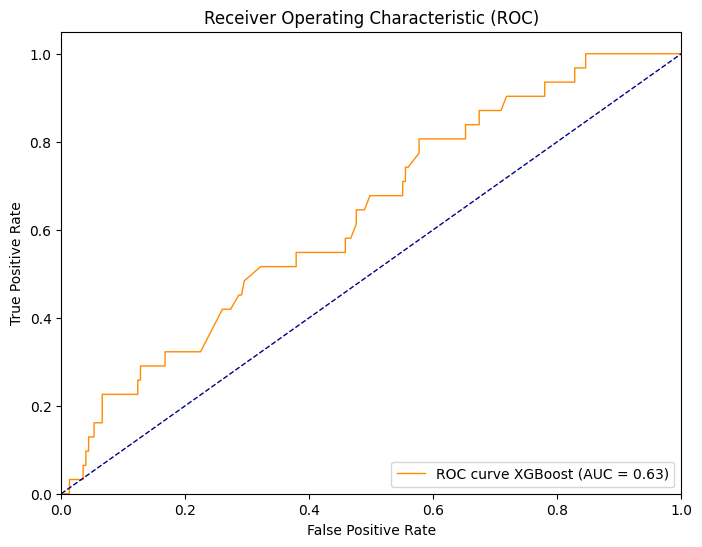

In [ ]:
from sklearn.metrics import roc_curve, auc

# Fazer previsões probabilísticas nas amostras de teste
y1_pred_proba = xgb.predict_proba(x1_test)[:, 1]

# Calcular a curva ROC
fpr_, tpr_, thresholds_ = roc_curve(y1_test, y1_pred_proba)
# Calcular a área sob a curva ROC (ROC AUC)
roc_auc_ = auc(fpr_, tpr_)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_, tpr_, color='darkorange', lw=1, label='ROC curve XGBoost (AUC = %0.2f)' % roc_auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Curvas ROC para comparativo do Random Florest e XGBoost (melhores algoritmos)

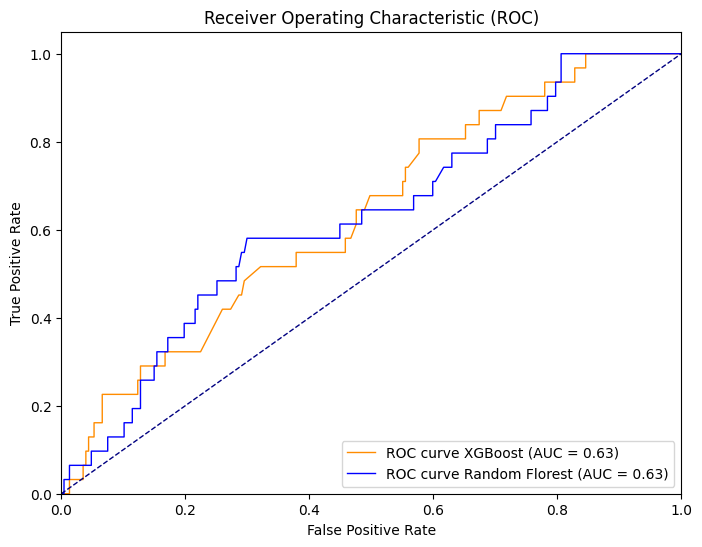

In [ ]:
# Fazer previsões probabilísticas nas amostras de teste
y1_pred_proba_xgb = xgb.predict_proba(x1_test)[:, 1]
y1_pred_proba_rf = rf.predict_proba(x1_test)[:, 1]

# Calcular a curva ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y1_test, y1_pred_proba_xgb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y1_test, y1_pred_proba_rf)
# Calcular a área sob a curva ROC (ROC AUC)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=1, label='ROC curve XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1, label='ROC curve Random Florest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# criando uma tabela com as métricas
col_names = ["Modelo", "Precision", "Recall", "AUC(ROC)"] # definindo o cabeçalho

# definindo os valores
data = [["Random Forest", precision_score(y1_test, y1_pred_rf), recall_score(y1_test, y1_pred_rf), roc_auc_score(y1_test, y1_prob_rf)],
        ["XGBoost", precision_score(y1_test, y1_pred_xgb), recall_score(y1_test, y1_pred_xgb), roc_auc_score(y1_test, y1_prob_xgb)],
        ["LightGBM", precision_score(y1_test, y1_pred_lgb), recall_score(y1_test, y1_pred_lgb), roc_auc_score(y1_test, y1_prob_lgb)],
        ["Catboost",precision_score(y1_test, y1_pred_cat), recall_score(y1_test, y1_pred_cat), roc_auc_score(y1_test, y1_prob_cat)]]


In [ ]:
# Ajuste de limiar para Random Forest
y1_pred_rf = rf.predict_proba(x1_test)[:, 1] > 0.08  # Limiar ajustado

# Ajuste de limiar para XGBoost
y1_pred_xgb = xgb.predict_proba(x1_test)[:, 1] > 0.05  # Limiar ajustado

# Ajuste de limiar para LightGBM
y1_pred_lgb = lgb.predict_proba(x1_test)[:, 1] > 0.08  # Limiar ajustado

# Ajuste de limiar para CatBoost
y1_pred_cat = cat.predict_proba(x1_test)[:, 1] > 0.05  # Limiar ajustado

In [ ]:
# criando uma tabela com as métricas
col_names = ["Modelo", "Precision", "Recall", "AUC(ROC)"]  # definindo o cabeçalho

# definindo os valores
data = [
    ["Random Forest", precision_score(y1_test, y1_pred_rf), recall_score(y1_test, y1_pred_rf), roc_auc_score(y1_test, y1_prob_rf)],
    ["XGBoost", precision_score(y1_test, y1_pred_xgb), recall_score(y1_test, y1_pred_xgb), roc_auc_score(y1_test, y1_prob_xgb)],
    ["LightGBM", precision_score(y1_test, y1_pred_lgb), recall_score(y1_test, y1_pred_lgb), roc_auc_score(y1_test, y1_prob_lgb)],
    ["Catboost", precision_score(y1_test, y1_pred_cat), recall_score(y1_test, y1_pred_cat), roc_auc_score(y1_test, y1_prob_cat)]
]

In [ ]:
pd.set_option('display.float_format', lambda x: '%2f' % x) # tabela com três casas decimais

print('Resultados para conjunto de teste.')
df_results = pd.DataFrame(data, columns = col_names) # transformando os resultados do teste em um data.frame

# função para destacarmos os maiores valores em cada uma das métricas
def highlight_max(s):
    if s.dtype == object:  # Uso do tipo `object` diretamente
        is_max = [False for _ in range(s.shape[0])]  # Declarando que quando o tipo de dado for objeto, não aplicaremos o highlight
    else:
        is_max = s == s.max()
    return ['background: yellow' if cell else '' for cell in is_max]

# Aplicar a função de destaque ao DataFrame
df_results_styled = df_results.style.apply(highlight_max)
df_results_styled

Resultados para conjunto de teste.


,Modelo,Precision,Recall,AUC(ROC)
0,Random Forest,0.140271,1.000000,0.628322
1,XGBoost,0.129167,1.000000,0.633366
2,LightGBM,0.129630,0.225806,0.525437
3,Catboost,0.120155,1.000000,0.617095


###Boruta

In [ ]:
 # instalando o boruta. Ideal é que para a versão final do código, as instalações e importações sejam reunidas no início
!pip install boruta

In [ ]:
#importando a função BorutaPy da biblioteca boruta
from boruta import BorutaPy

# Configurando o Boruta para o modelo Random Florest
boruta_selector = BorutaPy(xgb, n_estimators='auto', random_state=42)

# Aplicando o Boruta
boruta_selector.fit(x1_train.values,y1_train)

# Imprimindo os resultados
selected_features = x1_train.columns[boruta_selector.support_].to_list()
tentative_features = x1_train.columns[boruta_selector.support_weak_].to_list()
remove_features = list(set(x1_train.columns) - set(selected_features) - set(tentative_features))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print("Selected Features:", selected_features)
print("Tentative Features:", tentative_features)
print("To remove Features:", remove_features)
print("All Features:", x1_train.columns.to_list())

Selected Features: ['STDs__Number_of_diagnosis', 'Dx_Cancer']
Tentative Features: []
To remove Features: ['STDs__Time_since_first_diagnosis', 'STDs_syphilis', 'STDs__number_', 'STDs__V_rias', 'Nulos_Num_of_pregnancies', 'Num_of_pregnancies', 'IUD__years_', 'Smokes__years_', 'Nulos_Number_of_sexual_partners', 'Age', 'Hormonal_Contraceptives__years_', 'Dx', 'IUD', 'Hormonal_Contraceptives', 'Smokes', 'Dx_HPV', 'First_sexual_intercourse', 'STDs_condylomatosis', 'Number_of_sexual_partners', 'Smokes__packs_year_', 'STDs_HIV', 'Dx_CIN']
All Features: ['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse', 'Num_of_pregnancies', 'Smokes', 'Smokes__years_', 'Smokes__packs_year_', 'Hormonal_Contraceptives', 'Hormonal_Contraceptives__years_', 'IUD', 'IUD__years_', 'STDs__number_', 'STDs_condylomatosis', 'STDs_syphilis', 'STDs_HIV', 'STDs__Number_of_diagnosis', 'STDs__Time_since_first_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Nulos_Number_of_sexual_partners', 'Nulos_Num_of_pregn

In [ ]:
# Modelo com Boruta - Selecionado as variáveis preditoras
x1_train_boruta = x1_train[['Age','Hormonal_Contraceptives__years_', 'Dx_Cancer']]
x1_test_boruta = x1_test[['Age','Hormonal_Contraceptives__years_', 'Dx_Cancer']]

print('Shape sem boruta', x1_train.shape, x1_test.shape)
print('Shape com boruta', x1_train_boruta.shape, x1_test_boruta.shape)

xgb_boruta=XGBClassifier(eta=0.1, max_depth=3, n_estimators=50, random_state=42)
xgb_boruta.fit(x1_train_boruta, y1_train)

Shape sem boruta (600, 24) (258, 24)
Shape com boruta (600, 3) (258, 3)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

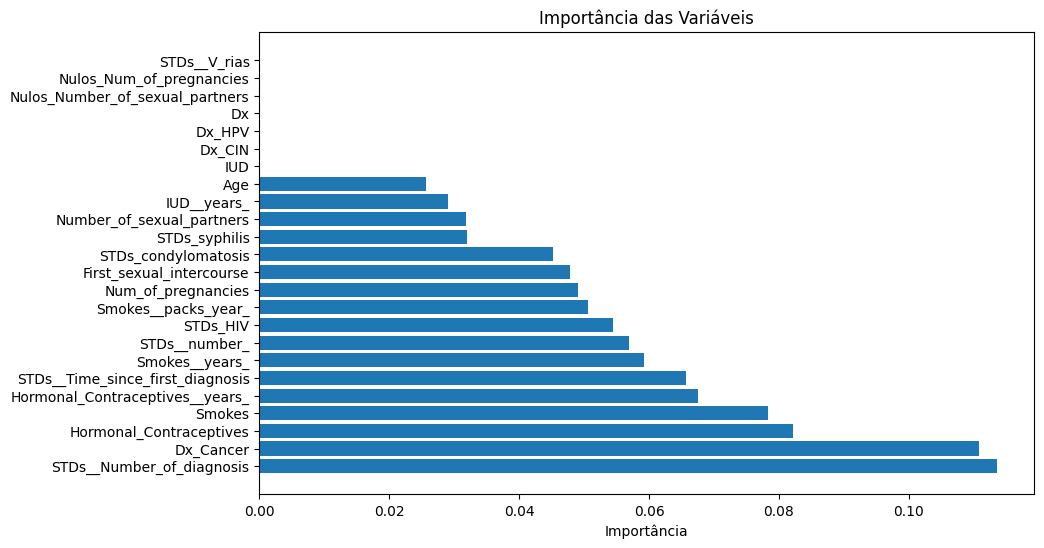

In [ ]:
# Ajustando o modelo com XGBoost
xgb = XGBClassifier(eta=0.1, max_depth=3, n_estimators=50, random_state=42)  # Use os melhores hiperparâmetros encontrados
xgb.fit(x1_train, y1_train)

# Obtendo as importâncias das variáveis
importances = xgb.feature_importances_

# Criando um DataFrame para as importâncias
importance_df = pd.DataFrame({
    'Feature': x1_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizando as importâncias
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importância")
plt.title("Importância das Variáveis")
plt.show()

In [ ]:
y1_pred_xgb_boruta = xgb_boruta.predict(x1_test_boruta)
y1_prob_xgb_boruta = xgb_boruta.predict_proba(x1_test_boruta)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y1_test, y1_pred_xgb_boruta)))
print("Precision: {:.4f}".format(precision_score(y1_test, y1_pred_xgb_boruta)))
print("Recall: {:.4f}".format(recall_score(y1_test, y1_pred_xgb_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y1_test, y1_prob_xgb_boruta)))

XGBoost Model
Accuracy: 0.8682
Precision: 0.2000
Recall: 0.0323
AUC: 0.5842


In [ ]:
y1_pred_xgb_boruta = xgb_boruta.predict(x1_test_boruta)
y1_pred_xgb_boruta = xgb_boruta.predict_proba(x1_test_boruta)[:, 1] > 0.08 #melhor limiar encontrado para o modelo
y1_prob_xgb_boruta = xgb_boruta.predict_proba(x1_test_boruta)[:,1]         #adicionar limiar agora, piora o modelo

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y1_test, y1_pred_xgb_boruta)))
print("Precision: {:.4f}".format(precision_score(y1_test, y1_pred_xgb_boruta)))
print("Recall: {:.4f}".format(recall_score(y1_test, y1_pred_xgb_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y1_test, y1_prob_xgb_boruta)))

XGBoost Model
Accuracy: 0.3488
Precision: 0.1297
Recall: 0.7742
AUC: 0.5842


In [ ]:
# Instalando a biblioteca Shapley
#Visualizar quanto uma variável está sendo usada numa predição
!pip install shap

In [ ]:
# Importando a biblioteca Shapley
import shap

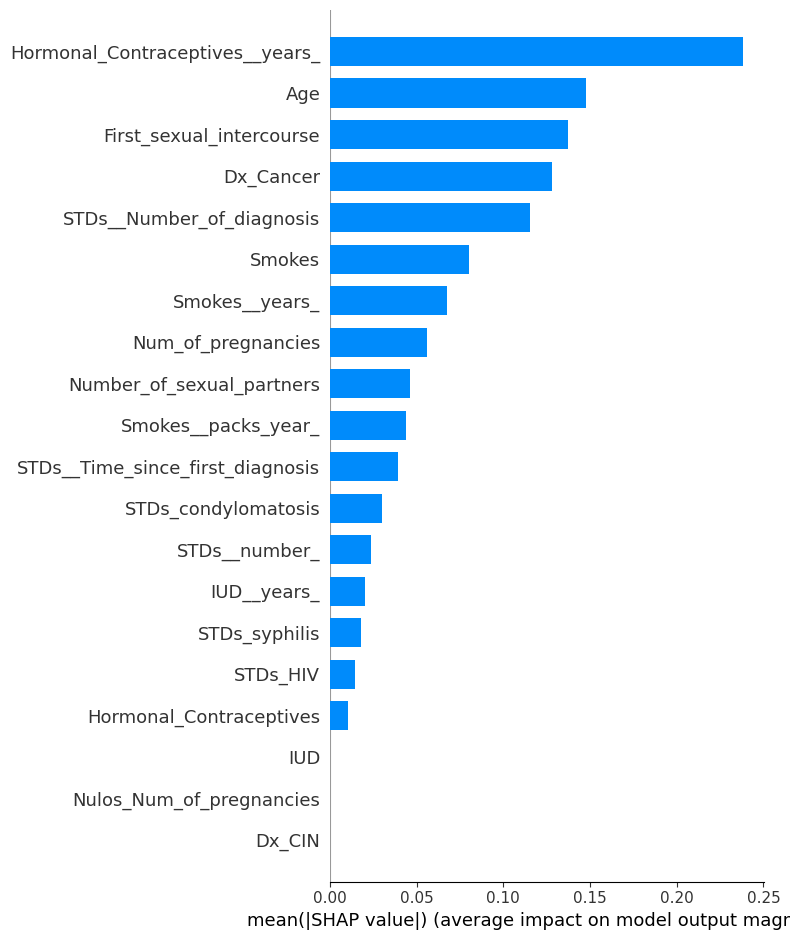

In [ ]:
# resultados no teste
shap_values_test = shap.TreeExplainer(xgb).shap_values(x1_test)
shap.summary_plot(shap_values_test, x1_test, plot_type="bar")

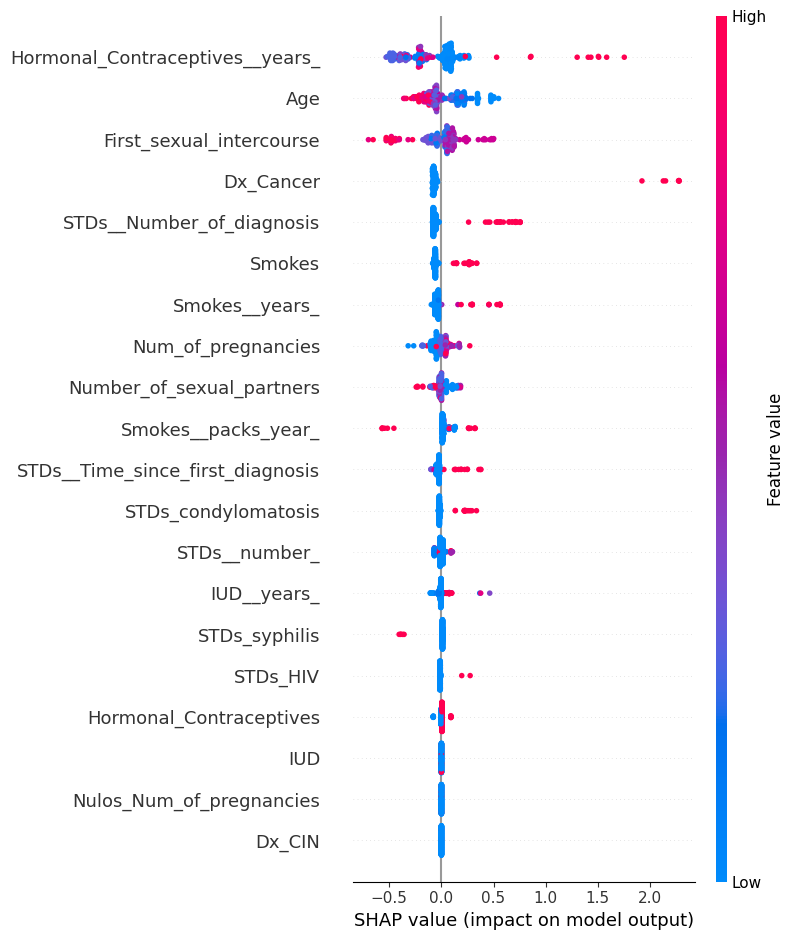

In [ ]:
# Gerando um gráfico resumo de SHAP para visualizar a importância das características
# 'shap_values_test': valores de SHAP calculados para o conjunto de teste, representando
# a contribuição de cada característica para as previsões do modelo.
# 'x1_test': conjunto de dados de teste cujas características estão sendo analisadas.
# O gráfico resultante mostra a distribuição e o impacto de cada característica nas previsões,
# facilitando a interpretação do modelo.

shap.summary_plot(shap_values_test, x1_test)